### Data Description

In [1]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
df = pd.read_csv('Case_Data.csv')
df.head()

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0,0,52303,41000,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0,332,175731,13100,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0,0,202012,16300,NaN,1.0,0.0
3,4.0,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,...,INDIVIDUAL,NaN,NaN,0,0,108235,34750,NaN,1.0,0.0
4,5.0,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,...,INDIVIDUAL,NaN,NaN,0,0,45492,14100,NaN,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Row ID                       368 non-null     float64
 1   id                           212999 non-null  int64  
 2   member_id                    212999 non-null  int64  
 3   loan_amnt                    212999 non-null  int64  
 4   funded_amnt                  212999 non-null  int64  
 5   term                         212999 non-null  object 
 6   int_rate                     212999 non-null  float64
 7   installment                  212999 non-null  float64
 8   grade                        212999 non-null  object 
 9   sub_grade                    212999 non-null  object 
 10  emp_title                    200209 non-null  object 
 11  emp_length                   200232 non-null  object 
 12  home_ownership               212999 non-null  object 
 13 

In [4]:
df.shape

(212999, 53)

#### Dropping the unnecessary columns

In [5]:
df.drop(['Row ID','Unnamed: 50'],axis=1, inplace=True)

In [6]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
purpose                         object
title                           object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                

In [7]:
df.drop(['36months','60months','sub_grade','purpose'],axis=1, inplace=True)

#### Checking the datatypes

In [8]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
title                           object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                

In [9]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'title',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [10]:
df['issue_d']

0         15-Sep
1         15-Sep
2         15-Sep
3         15-Sep
4         15-Sep
           ...  
212994    15-Jul
212995    15-Jul
212996    15-Jul
212997    15-Jul
212998    15-Jul
Name: issue_d, Length: 212999, dtype: object

In [11]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%y-%b', errors='coerce')


df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.strftime('%b')  

In [12]:
df = df.drop('issue_d', axis=1)

In [13]:
df['earliest_cr_line']

0         Sep-00
1          2-Sep
2          6-Feb
3         Oct-99
4         Nov-99
           ...  
212994     2-Jul
212995     5-Sep
212996     9-Feb
212997    Mar-85
212998     1-Mar
Name: earliest_cr_line, Length: 212999, dtype: object

In [14]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Extracting the year and month into separate columns
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.strftime('%b')

In [15]:
df = df.drop('earliest_cr_line', axis=1)

In [16]:
df['last_pymnt_d']

0            NaN
1         15-Oct
2         15-Oct
3         15-Oct
4         15-Oct
           ...  
212994    16-Jan
212995    15-Dec
212996    16-Jan
212997    16-Jan
212998    16-Jan
Name: last_pymnt_d, Length: 212999, dtype: object

In [17]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%y-%b', errors='coerce')

# Extracting the year and month into separate columns
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.strftime('%b')  # Abbreviated month name


In [18]:
df['last_pymnt_d_year']

0            NaN
1         2015.0
2         2015.0
3         2015.0
4         2015.0
           ...  
212994    2016.0
212995    2015.0
212996    2016.0
212997    2016.0
212998    2016.0
Name: last_pymnt_d_year, Length: 212999, dtype: float64

In [19]:
df = df.drop('last_pymnt_d', axis=1)

In [20]:
df['next_pymnt_d']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
212994    16-Feb
212995    16-Feb
212996    16-Feb
212997    16-Feb
212998    16-Feb
Name: next_pymnt_d, Length: 212999, dtype: object

In [21]:

df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%y-%b', errors='coerce')

# Extracting the year and month into separate columns
df['next_pymnt_d_year'] = df['next_pymnt_d'].dt.year
df['next_pymnt_d_month'] = df['next_pymnt_d'].dt.strftime('%b')  # Abbreviated month name


In [22]:
df = df.drop('next_pymnt_d', axis=1)

In [23]:
df['last_credit_pull_d']

0         16-Jan
1         16-Jan
2         16-Jan
3         16-Jan
4         16-Jan
           ...  
212994    16-Jan
212995    16-Jan
212996    16-Jan
212997    16-Jan
212998    16-Jan
Name: last_credit_pull_d, Length: 212999, dtype: object

In [24]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%y-%b', errors='coerce')

# Extracting the year and month into separate columns
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.strftime('%b')  # Abbreviated month name


In [25]:
df = df.drop('last_credit_pull_d', axis=1)

In [26]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'title', 'initial_list_status',
       'application_type', 'issue_month', 'earliest_cr_line_month',
       'last_pymnt_d_month', 'next_pymnt_d_month', 'last_credit_pull_d_month'],
      dtype='object')

In [27]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
loan_status                     object
title                           object
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
initial_list_status             object
out_prncp                

### Univariate Analysis

#### Analysis of the Target Variable-- loan_status

In [28]:
df['loan_status'].unique()

array(['Charged Off', 'Current'], dtype=object)

In [29]:
df.loan_status.describe()

count      212999
unique          2
top       Current
freq       210226
Name: loan_status, dtype: object

In [30]:
imbalance_percentage = df['loan_status'].value_counts(normalize=True) * 100
print(imbalance_percentage)

Current        98.698116
Charged Off     1.301884
Name: loan_status, dtype: float64


<Axes: >

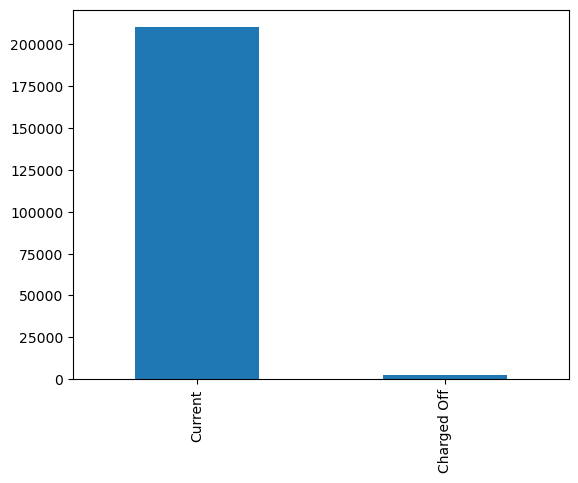

In [31]:
df.loan_status.value_counts().plot(kind='bar')

In [32]:
df.select_dtypes(include=np.number).columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'issue_year',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'next_pymnt_d_year',
       'last_credit_pull_d_year'],
      dtype='object')

#### Analysis of the numeric variables

<Axes: >

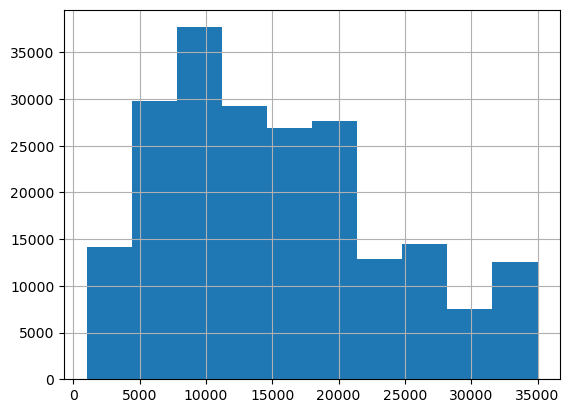

In [33]:
df['loan_amnt'].hist()

<Axes: xlabel='loan_amnt', ylabel='Density'>

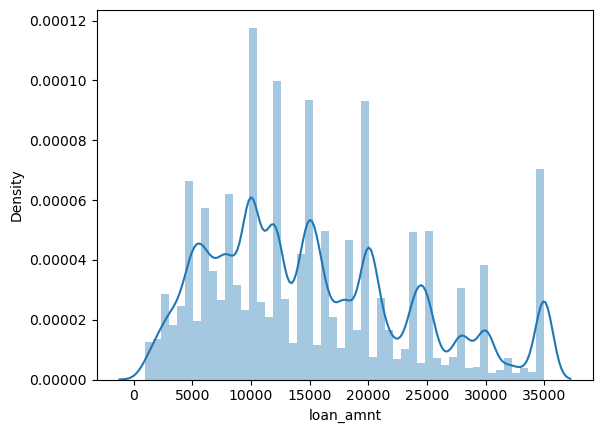

In [34]:
sns.distplot(df['loan_amnt'])

In [35]:
df['loan_amnt'].skew()

0.617501484166948

In [36]:
df['loan_amnt'].describe()

count    212999.000000
mean      15257.965530
std        8611.713377
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

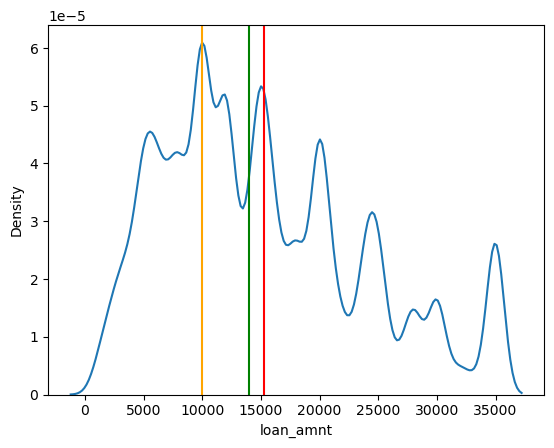

In [37]:
me = df['loan_amnt'].mean()
md = df['loan_amnt'].median()
mo = df['loan_amnt'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['loan_amnt']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

<Axes: >

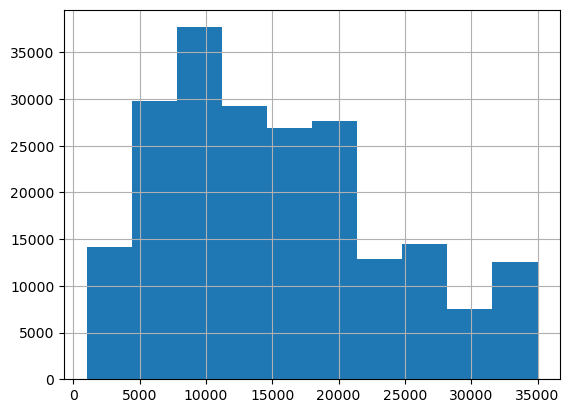

In [38]:
df['funded_amnt'].hist()

<Axes: xlabel='funded_amnt', ylabel='Density'>

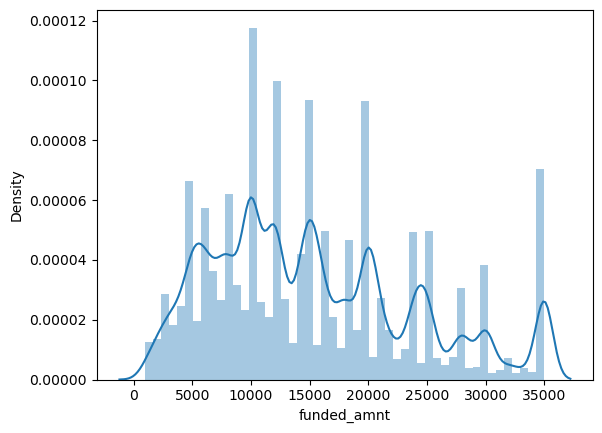

In [39]:
sns.distplot(df['funded_amnt'])

In [40]:
df['funded_amnt'].describe()

count    212999.000000
mean      15257.965530
std        8611.713377
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

<Axes: >

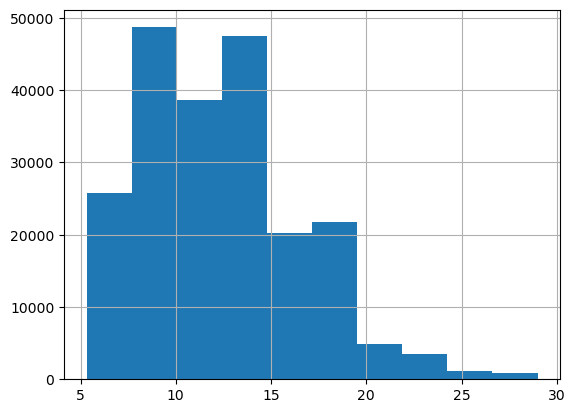

In [41]:
df['int_rate'].hist()

<Axes: xlabel='int_rate', ylabel='Density'>

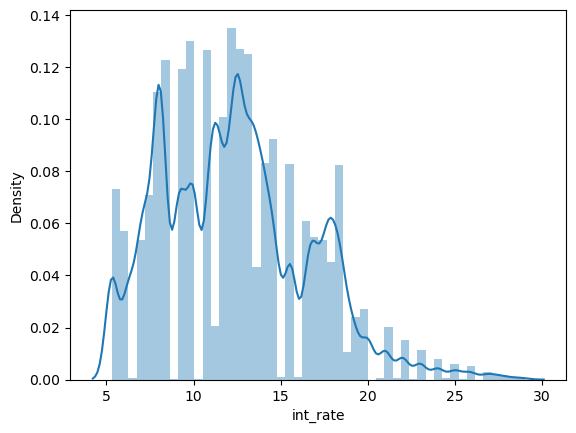

In [42]:
sns.distplot(df['int_rate'])

In [43]:
df['int_rate'].describe()

count    212999.000000
mean         12.401658
std           4.249365
min           5.320000
25%           9.170000
50%          12.290000
75%          14.650000
max          28.990000
Name: int_rate, dtype: float64

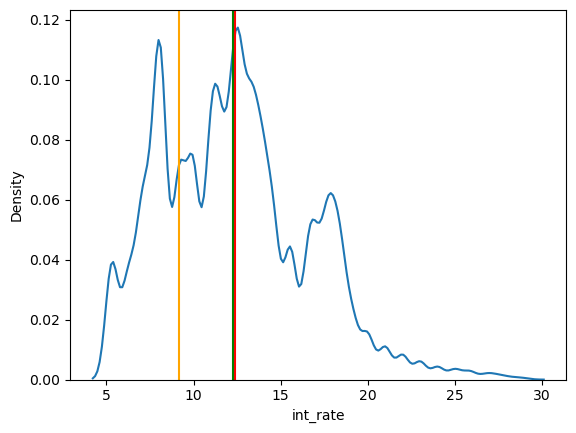

In [44]:
me = df['int_rate'].mean()
md = df['int_rate'].median()
mo = df['int_rate'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['int_rate']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

<Axes: >

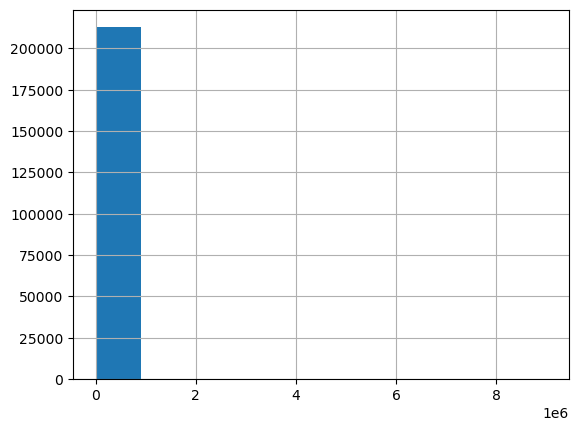

In [45]:
df['annual_inc'].hist()

<Axes: xlabel='annual_inc', ylabel='Density'>

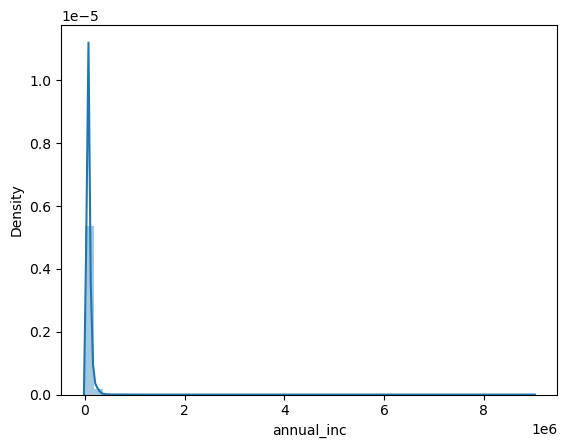

In [46]:
sns.distplot(df['annual_inc'])

In [47]:
df['annual_inc'].describe()

count    2.129990e+05
mean     7.780071e+04
std      8.188065e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.250000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64

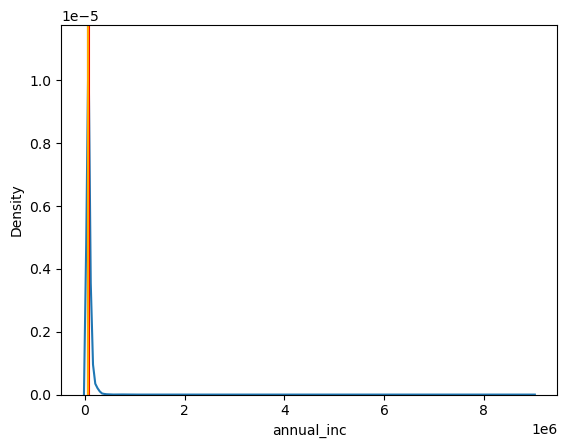

In [48]:
me = df['annual_inc'].mean()
md = df['annual_inc'].median()
mo = df['annual_inc'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['annual_inc']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

<Axes: >

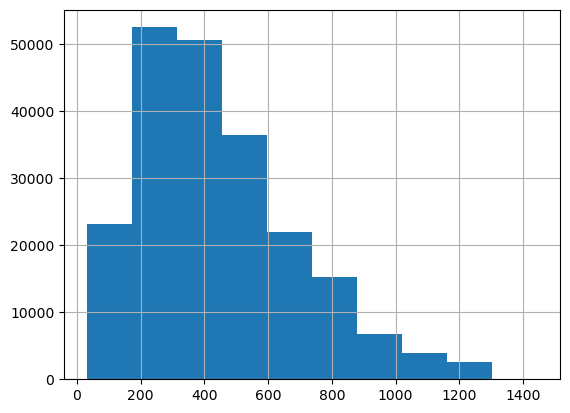

In [49]:
df['installment'].hist()

<Axes: xlabel='installment', ylabel='Density'>

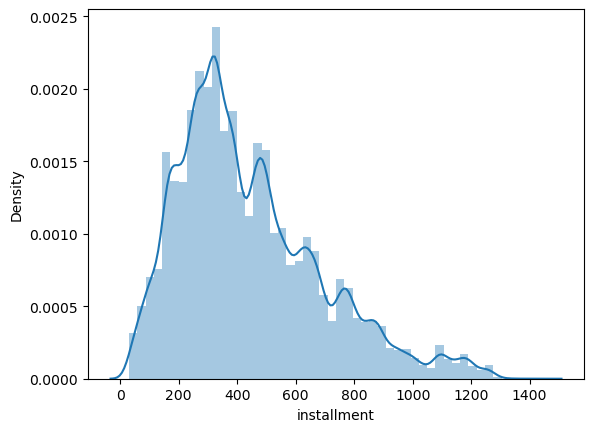

In [50]:
sns.distplot(df['installment'])

In [51]:
df['installment'].describe()

count    212999.000000
mean        440.842921
std         245.858646
min          30.120000
25%         262.230000
50%         382.870000
75%         578.790000
max        1445.460000
Name: installment, dtype: float64

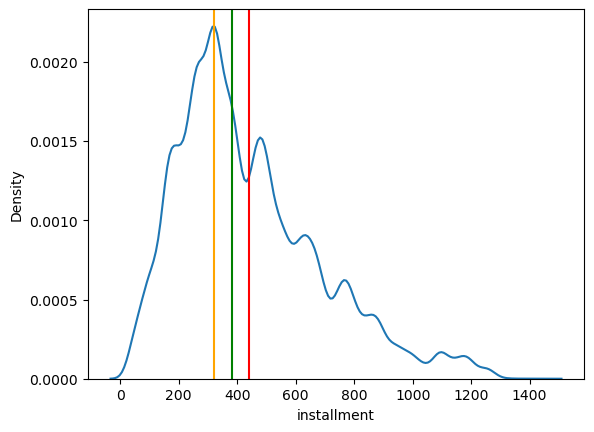

In [52]:
me = df['installment'].mean()
md = df['installment'].median()
mo = df['installment'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['installment']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

#### Analysis of categoric variables

In [53]:
df['emp_title'].nunique()

69666

In [54]:
df = df.drop('emp_title', axis=1)

In [55]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

In [56]:
cols =df.select_dtypes(include=object).columns

In [57]:
cols

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month'],
      dtype='object')

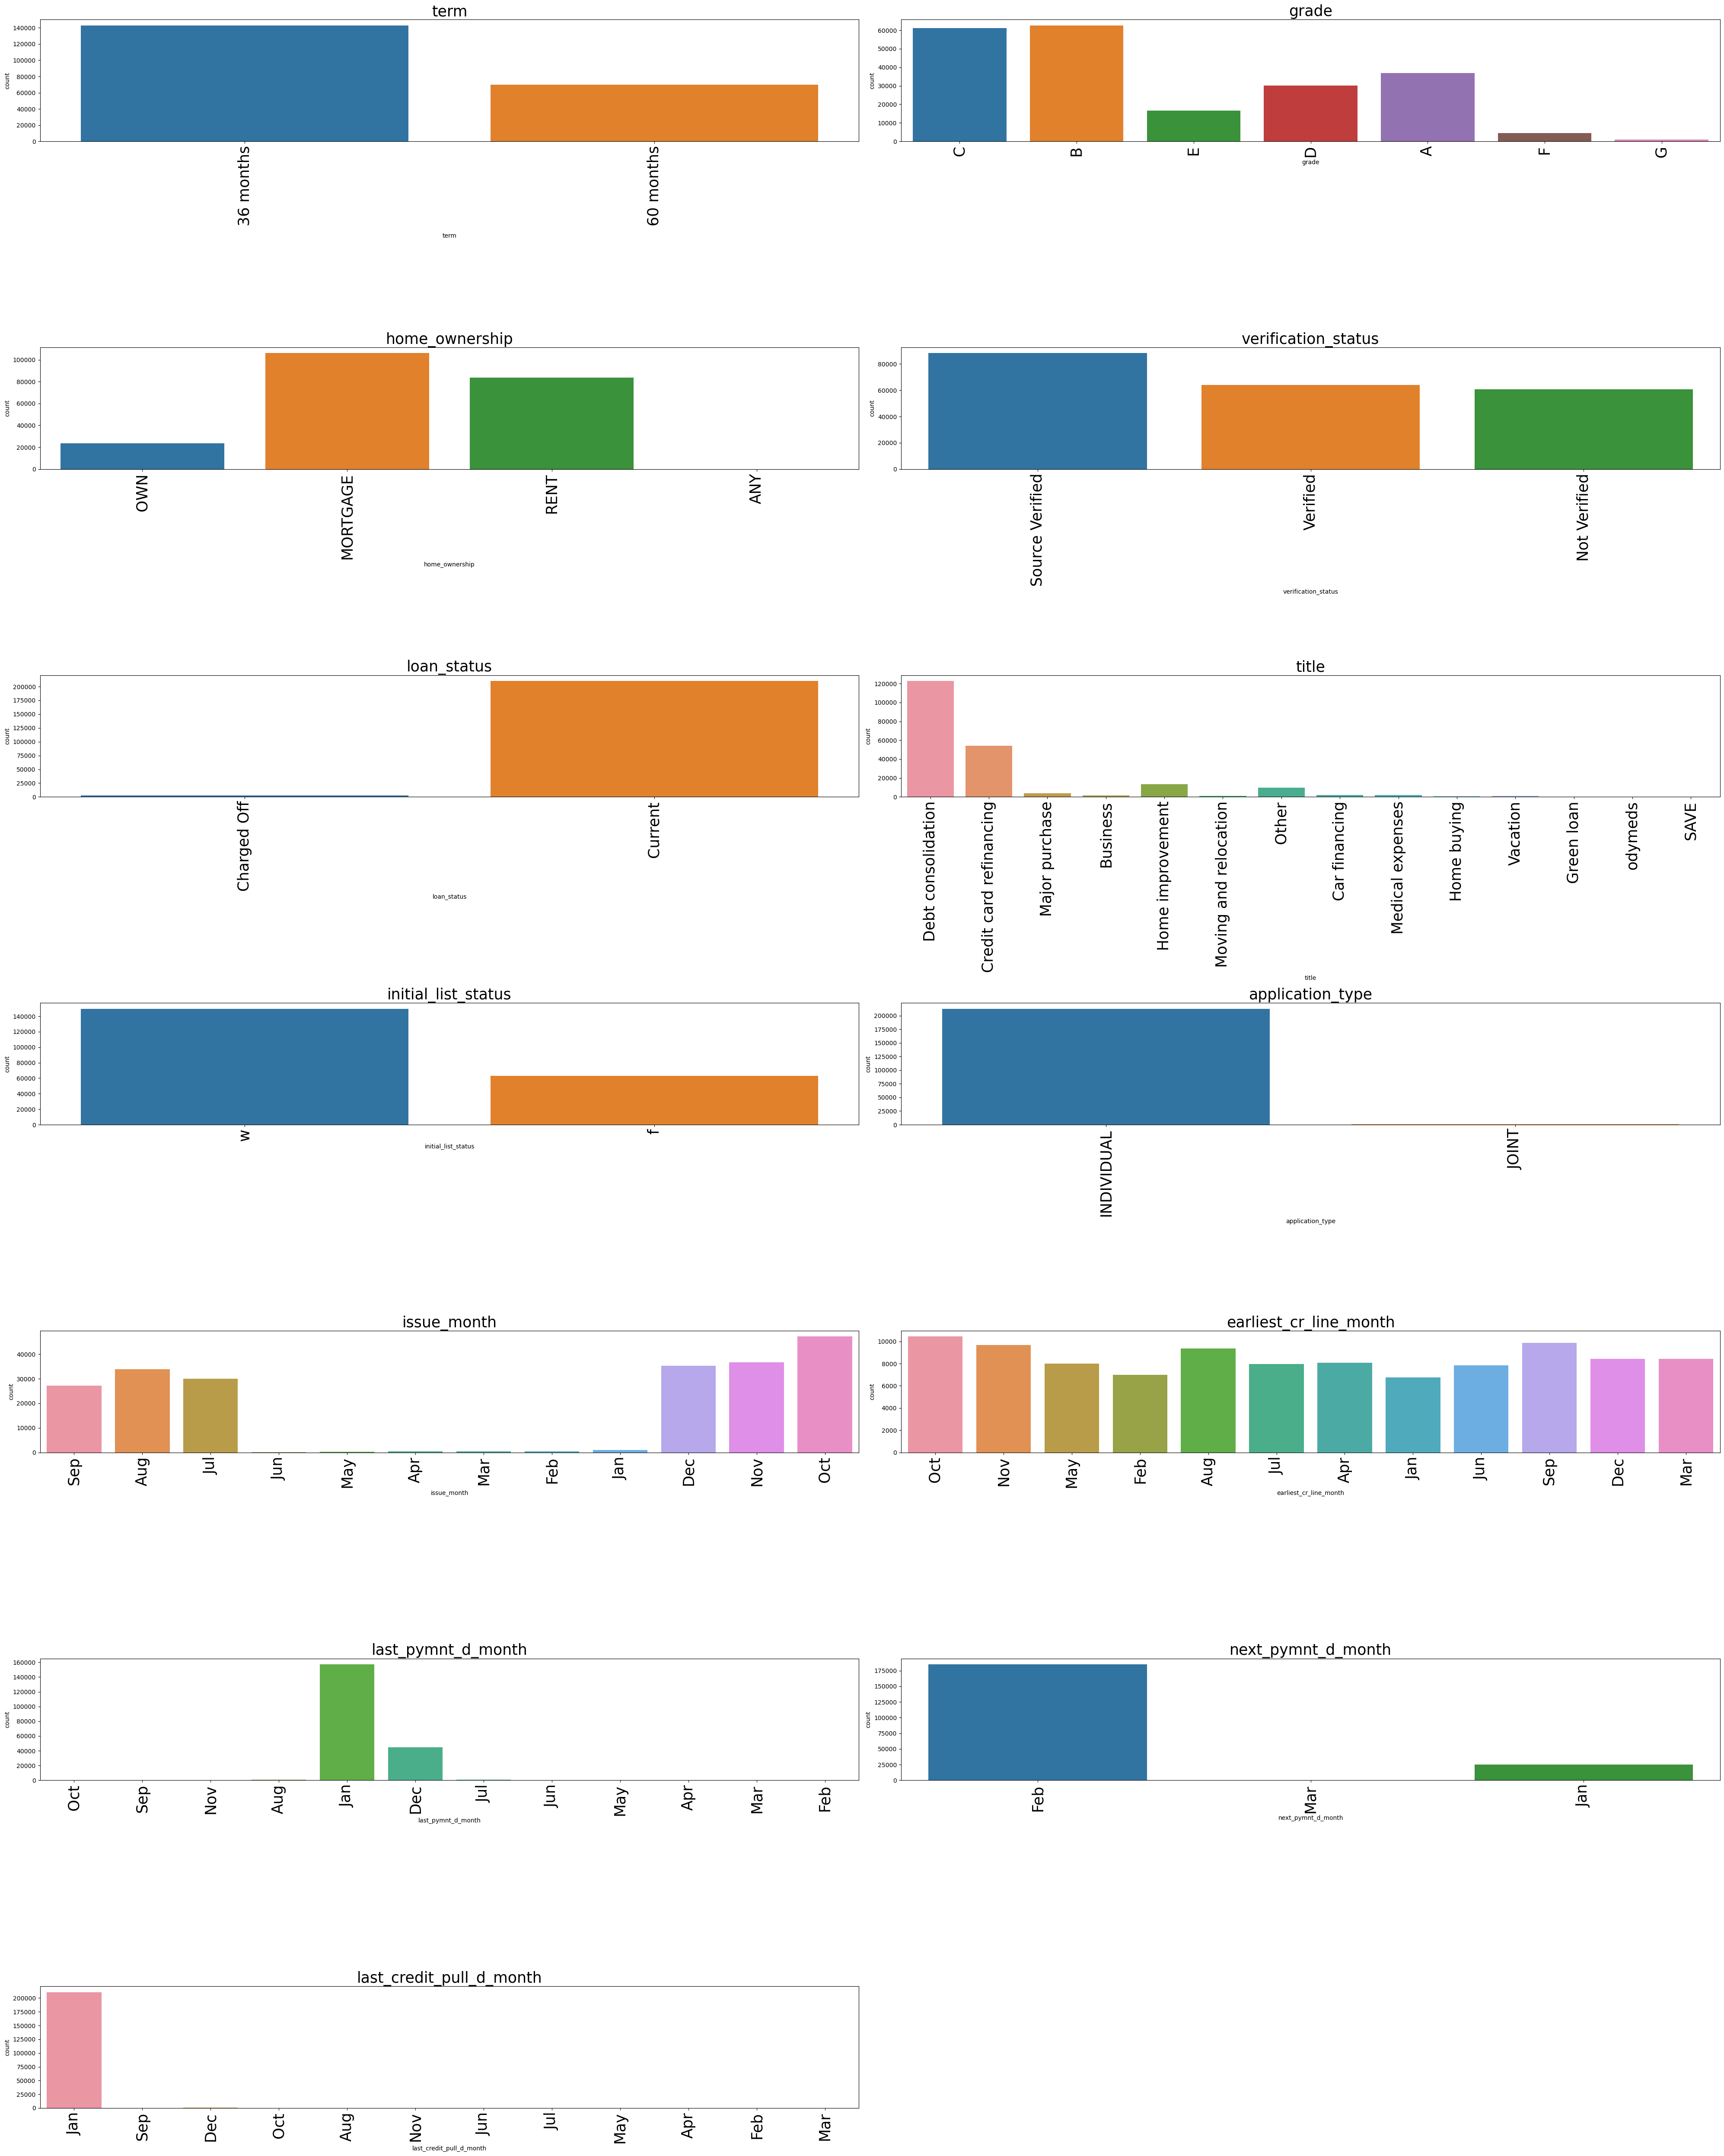

In [58]:
num_cols = 2  # Number of columns for subplots
num_rows = len(cols) // num_cols + (len(cols) % num_cols > 0)  # Calculate the number of rows

j = 1
plt.figure(figsize=(40, 50))
for i in cols:  
    plt.subplot(num_rows, num_cols, j)
    sns.countplot(x=df.loc[:, i])
    plt.title(i, fontsize=25)
    plt.xticks(rotation=90, fontsize=25)
    j += 1

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Numeric vs categoric

In [59]:
num_cols = ['loan_amnt','int_rate',
       'installment','annual_inc', 'dti', 'delinq_2yrs']

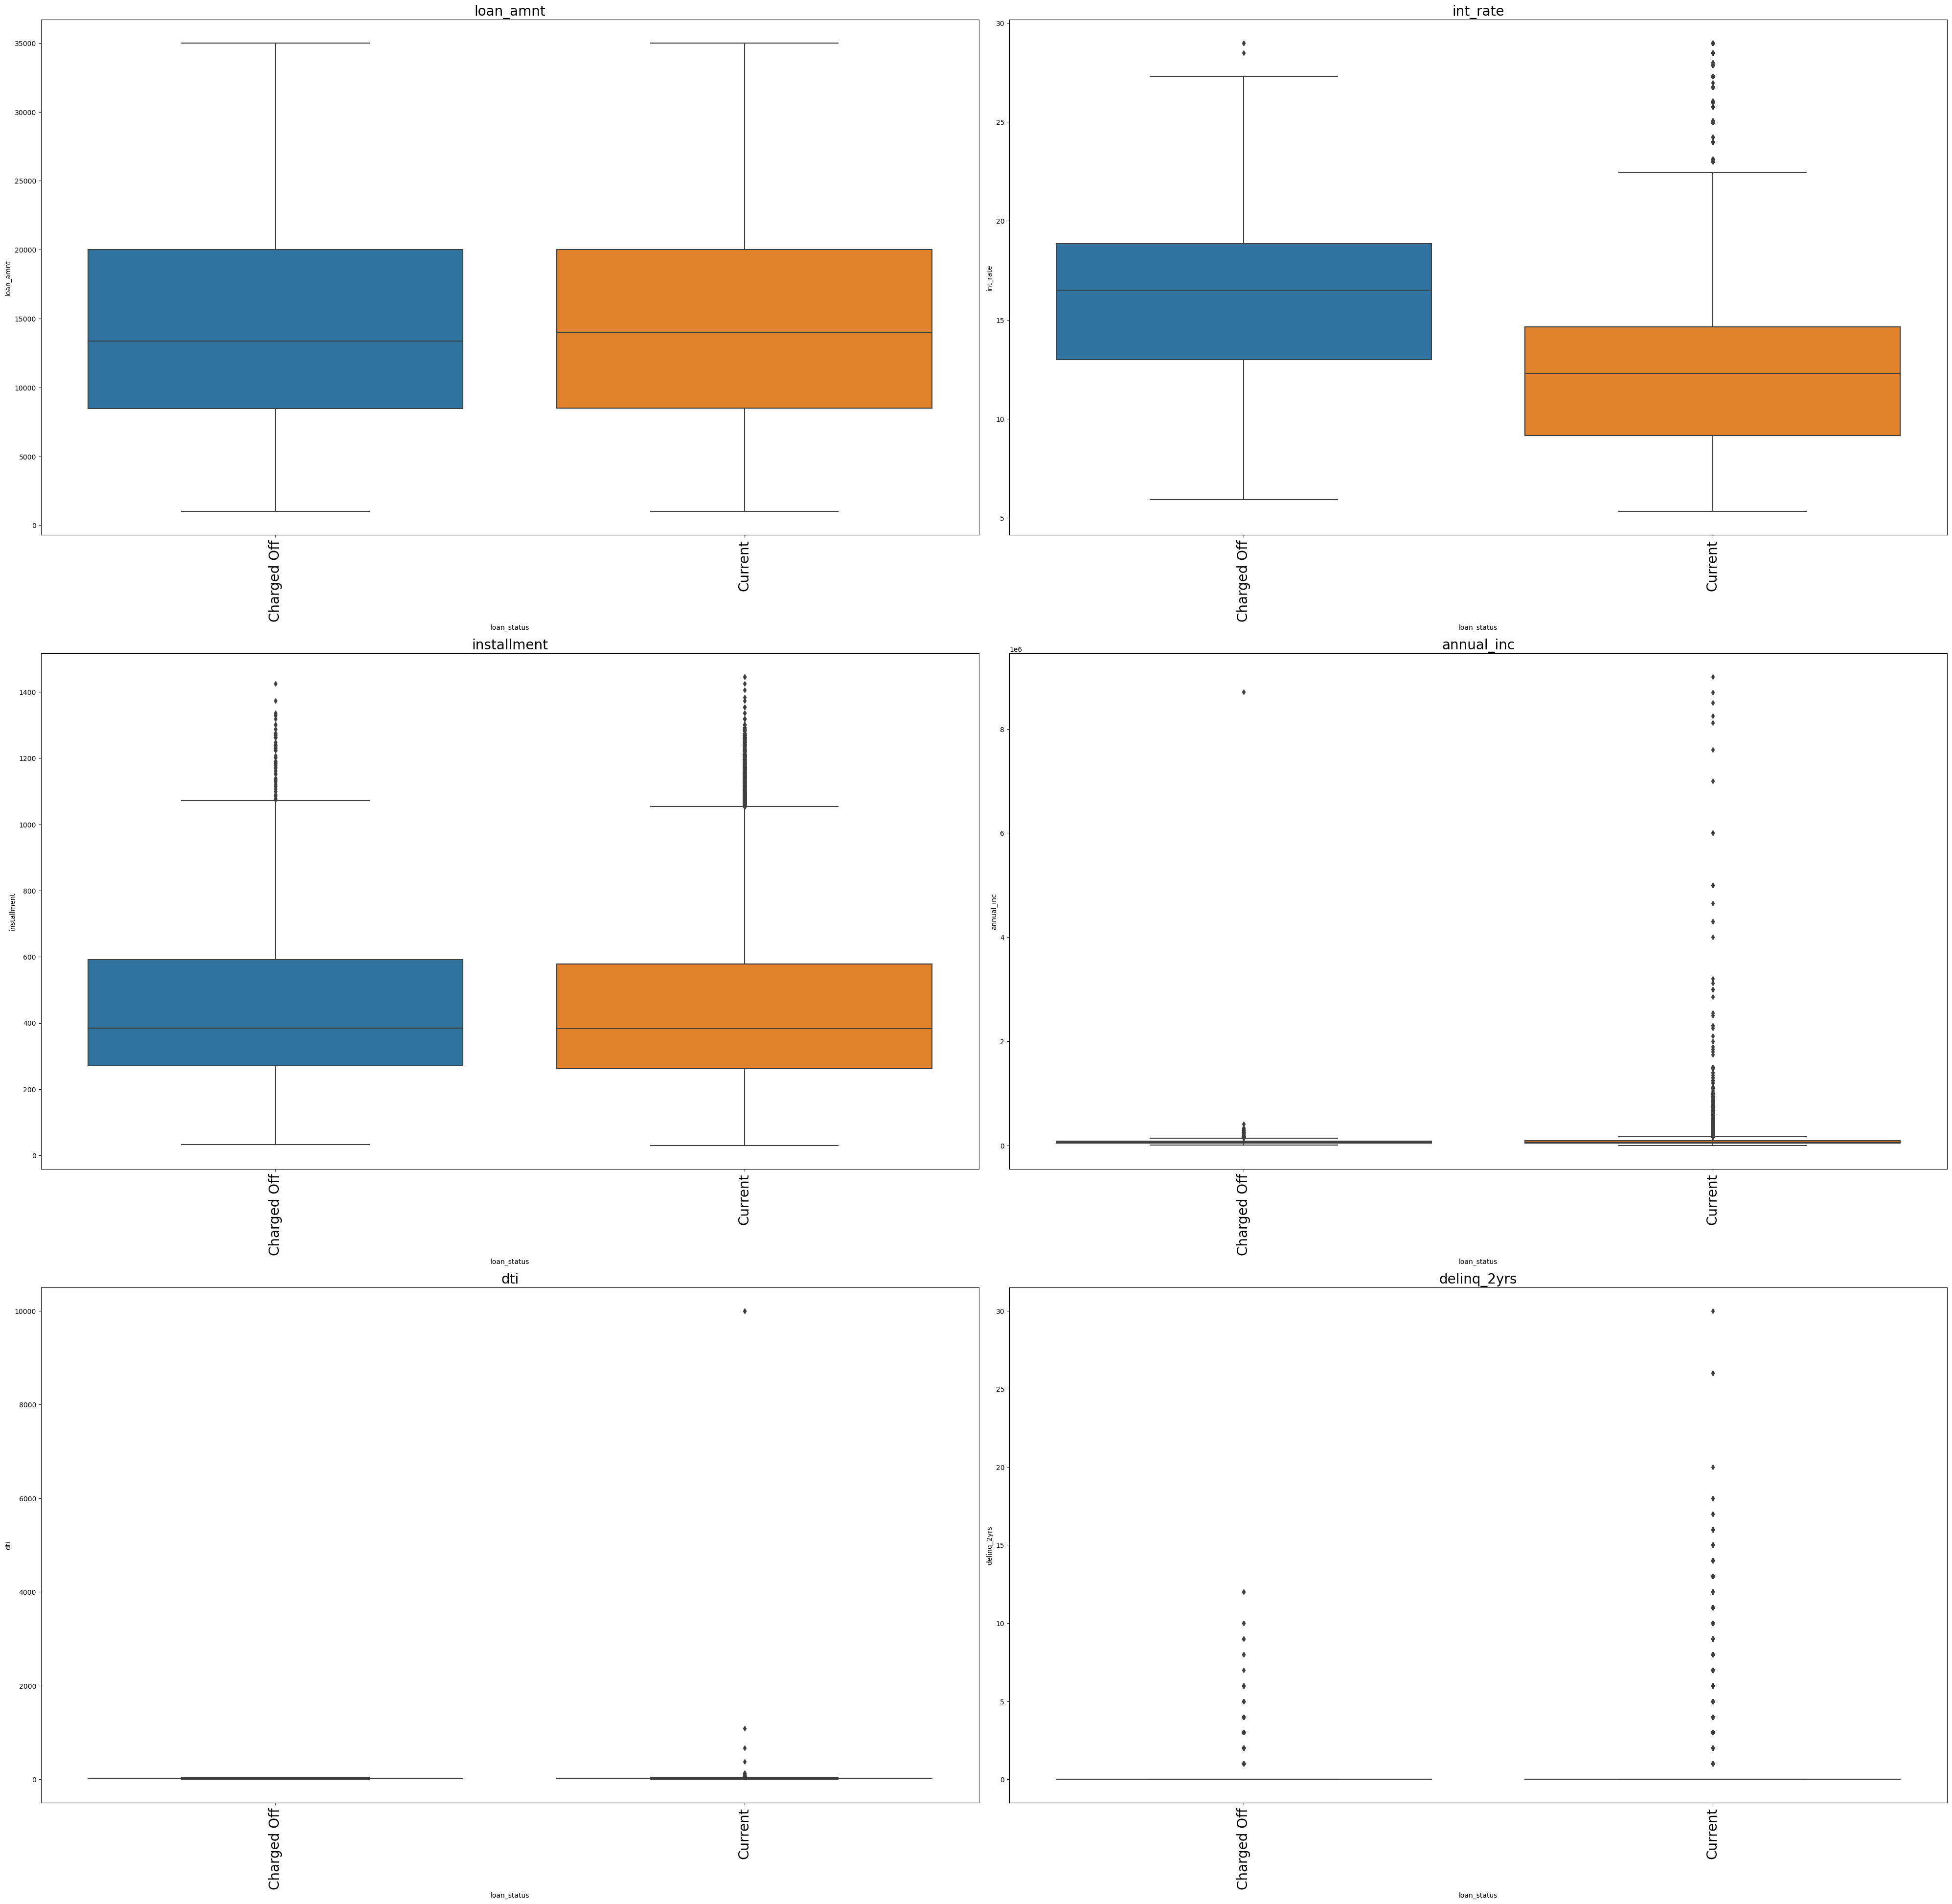

In [60]:
j=1
plt.figure(figsize=(40, 50))
for i in num_cols:
  plt.subplot(4,2,j)
  sns.boxplot(x= df['loan_status'] ,y=df.loc[:,i])
  plt.title(i, fontsize=20)
  j = j+1

  plt.xticks(rotation=90, fontsize=20)

plt.tight_layout()
plt.show()

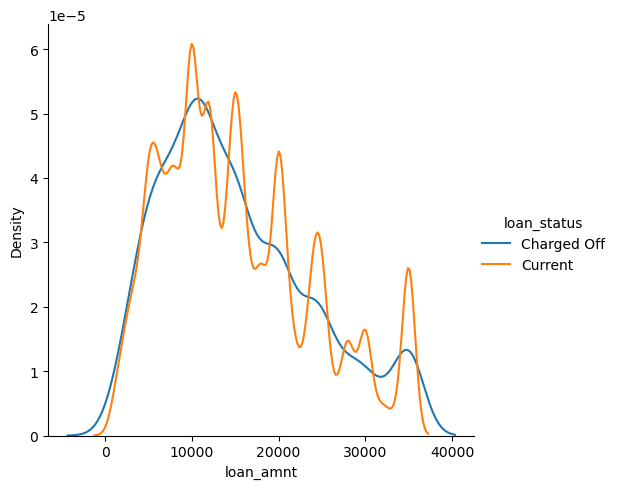

In [61]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'loan_amnt')
g.add_legend()

plt.show()

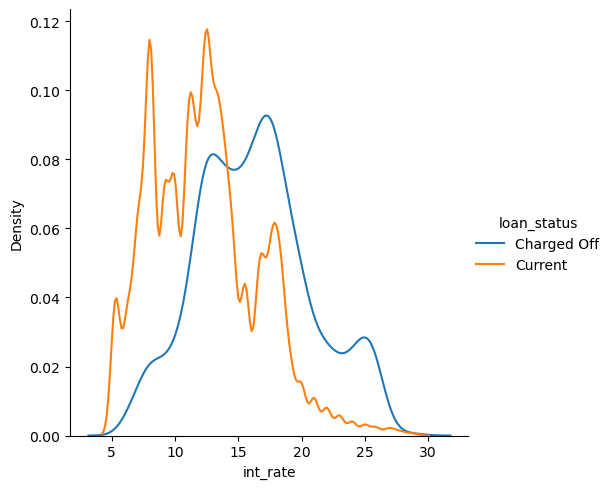

In [62]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'int_rate')
g.add_legend()

plt.show()

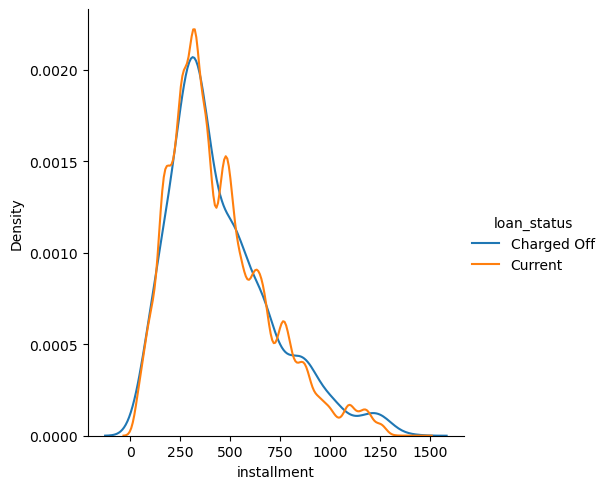

In [63]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'installment')
g.add_legend()

plt.show()

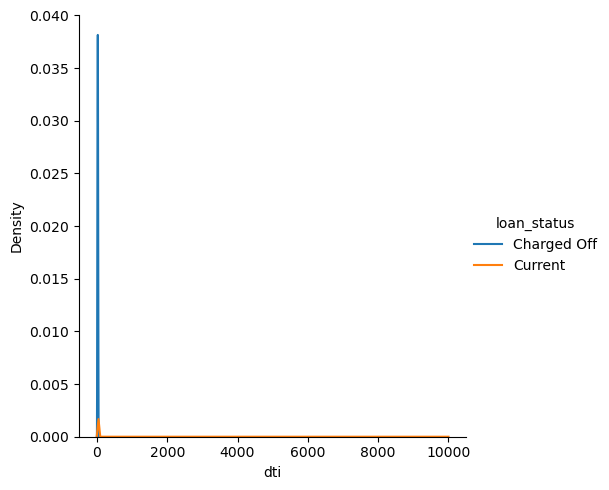

In [64]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'dti')
g.add_legend()

plt.show()

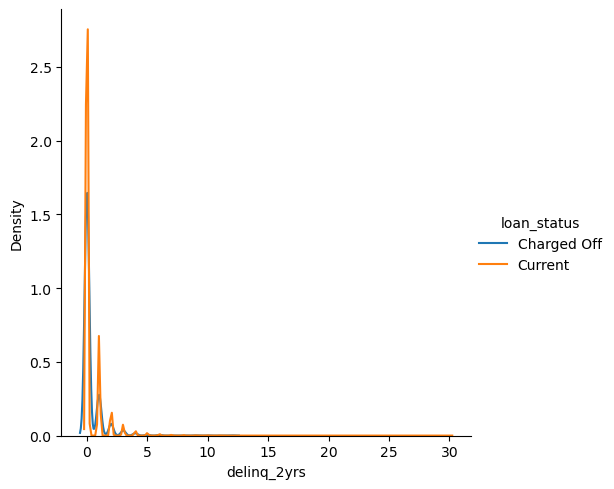

In [65]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'delinq_2yrs')
g.add_legend()

plt.show()

#### Categorical vs categorical

In [66]:
df.select_dtypes(include=object)

,term,grade,home_ownership,verification_status,loan_status,title,initial_list_status,application_type,issue_month,earliest_cr_line_month,last_pymnt_d_month,next_pymnt_d_month,last_credit_pull_d_month
0,36 months,C,OWN,Source Verified,Charged Off,Debt consolidation,w,INDIVIDUAL,Sep,NaN,NaN,NaN,Jan
1,36 months,C,MORTGAGE,Source Verified,Charged Off,Debt consolidation,w,INDIVIDUAL,Sep,NaN,Oct,NaN,Jan
2,36 months,B,MORTGAGE,Source Verified,Charged Off,Debt consolidation,f,INDIVIDUAL,Sep,NaN,Oct,NaN,Jan
3,36 months,B,MORTGAGE,Source Verified,Charged Off,Credit card refinancing,f,INDIVIDUAL,Sep,Oct,Oct,NaN,Jan
4,36 months,E,RENT,Verified,Charged Off,Debt consolidation,w,INDIVIDUAL,Sep,Nov,Oct,NaN,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212994,36 months,C,RENT,Source Verified,Current,Debt consolidation,w,INDIVIDUAL,Jul,NaN,Jan,Feb,Jan
212995,36 months,B,RENT,Not Verified,Current,Credit card refinancing,w,INDIVIDUAL,Jul,NaN,Dec,Feb,Jan
212996,60 months,E,RENT,Source Verified,Current,Debt consolidation,w,INDIVIDUAL,Jul,NaN,Jan,Feb,Jan
212997,36 months,D,MORTGAGE,Verified,Current,Other,w,INDIVIDUAL,Jul,Mar,Jan,Feb,Jan


In [67]:
cats = ['term','grade','home_ownership','application_type']

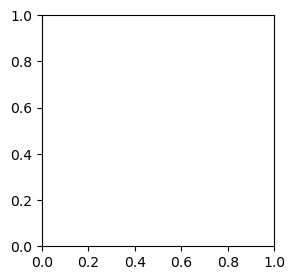

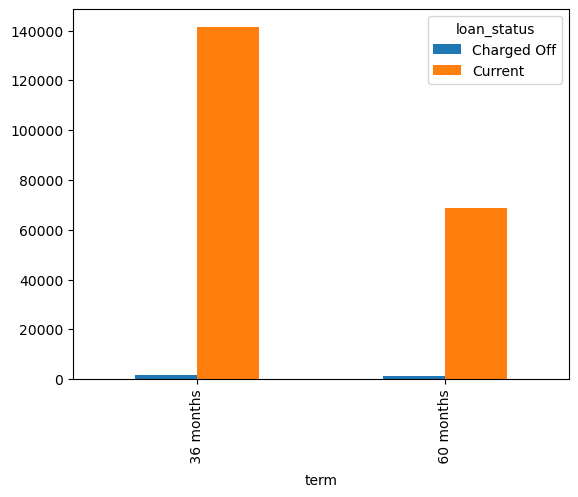

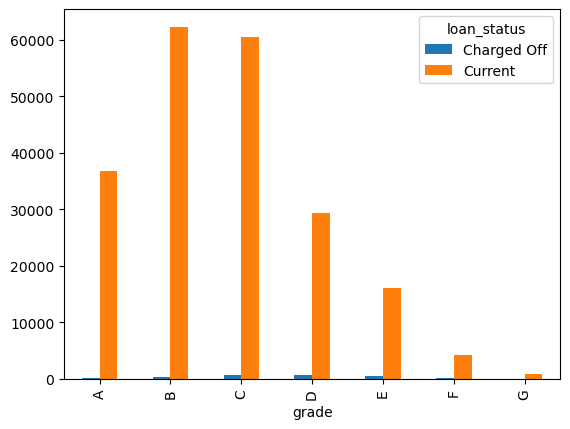

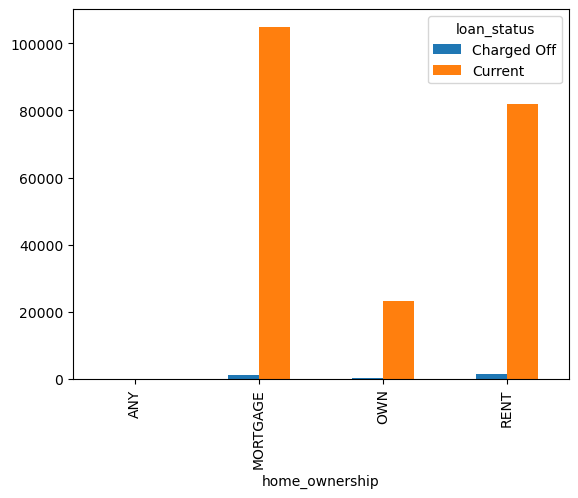

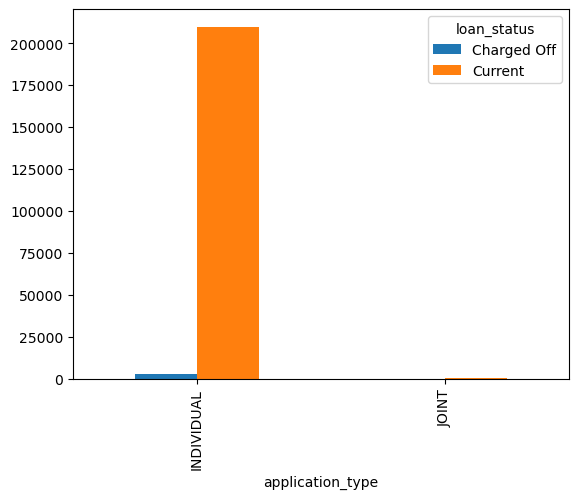

In [68]:
plt.subplots(figsize=(3,3))
for i in cats:
  pd.crosstab(df[i],df['loan_status']).plot(kind='bar')
plt.show()

### Multivariate Analysis

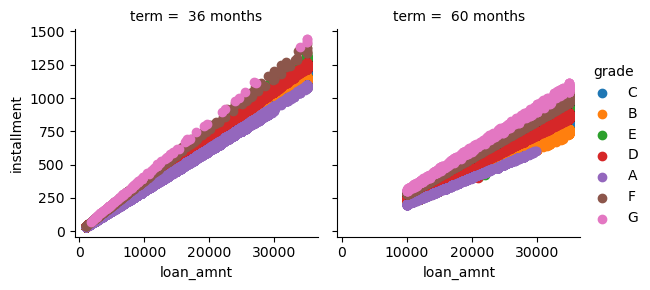

In [69]:
plot= sns.FacetGrid(df,col='term',hue='grade')
plot.map(plt.scatter,'loan_amnt','installment').add_legend()
plt.show()

In [70]:
df.drop(['id', 'member_id'],axis=1, inplace=True)

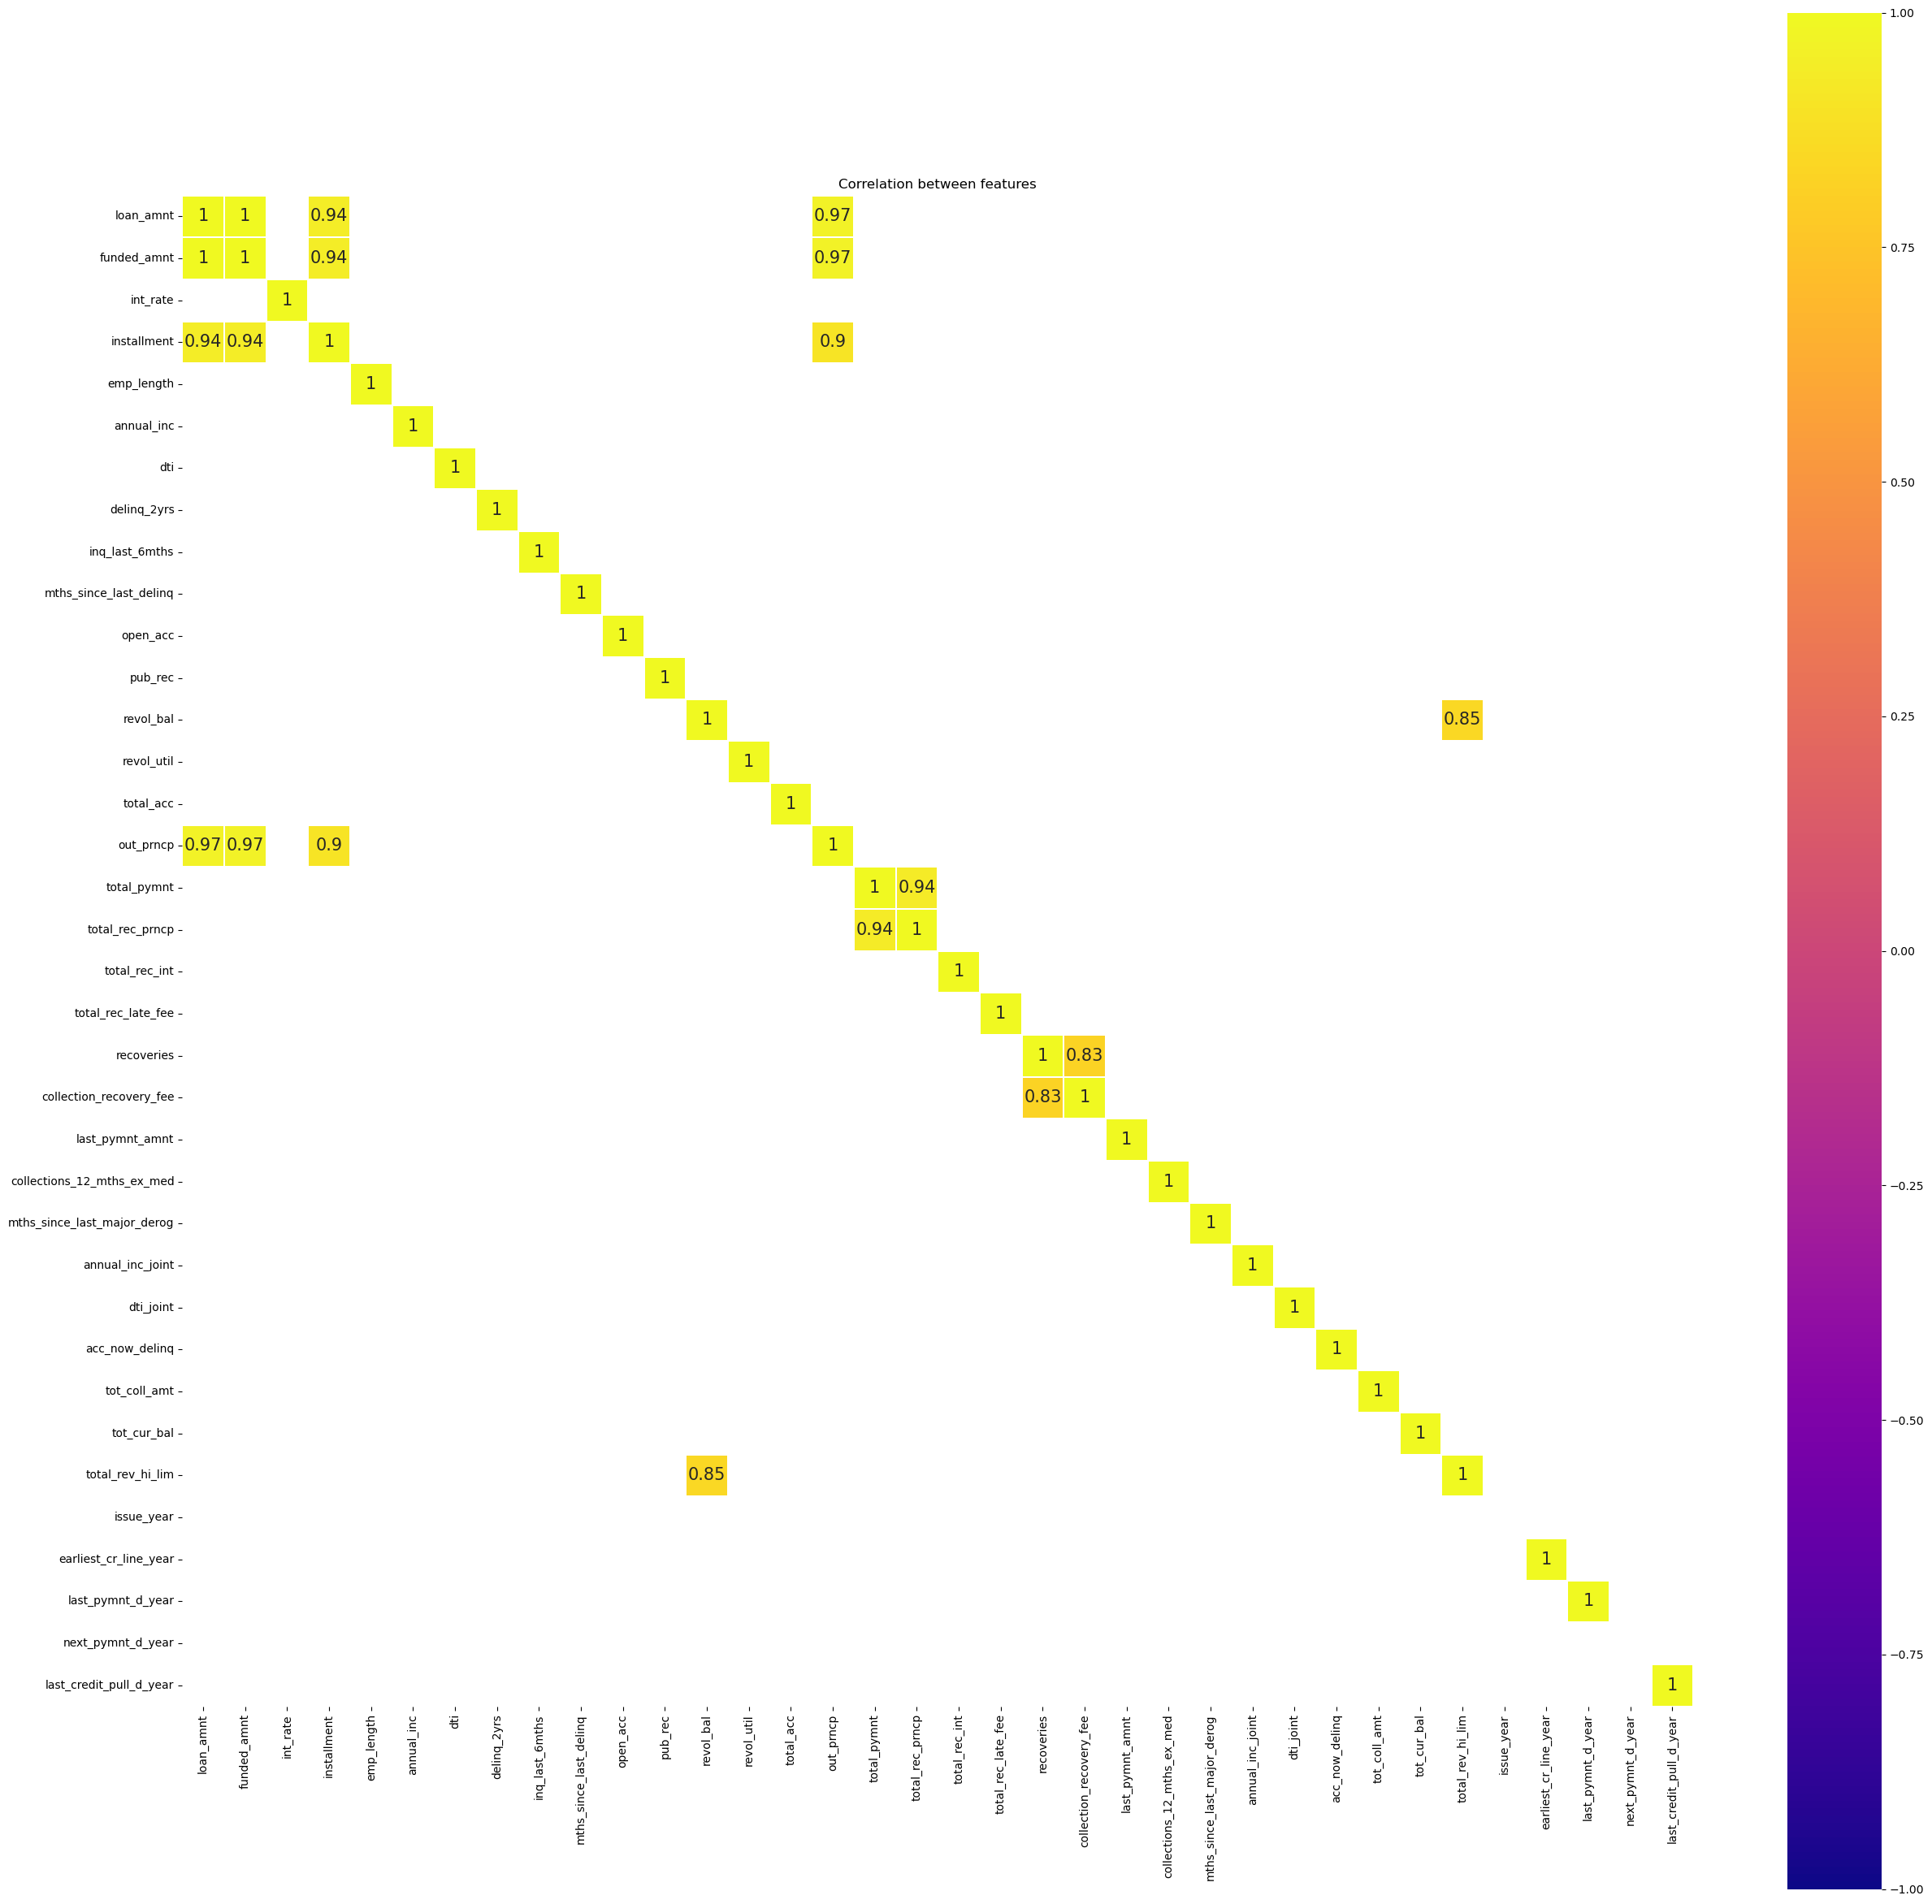

In [71]:
plt.figure(figsize=(30, 30))


sns.heatmap(df.corr()[(df.corr() >= 0.75) | (df.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

In [72]:
columns_to_drop=['funded_amnt','out_prncp', 'recoveries','total_rev_hi_lim', 'open_acc', 'total_rec_prncp']

In [73]:
df.drop(columns=columns_to_drop, inplace=True)

In [74]:
df.shape

(212999, 43)

### Null Value Treatment

In [75]:
df.isnull().sum()/len(df)*100

loan_amnt                       0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
emp_length                      5.993925
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
loan_status                     0.000000
title                           0.007042
dti                             0.000000
delinq_2yrs                     0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         48.531214
pub_rec                         0.000000
revol_bal                       0.000000
revol_util                      0.038498
total_acc                       0.000000
initial_list_status             0.000000
total_pymnt                     0.000000
total_rec_int                   0.000000
total_rec_late_fee              0.000000
collection_recovery_fee         0.000000
last_pymnt_amnt 

In [76]:
df.drop(['annual_inc_joint','dti_joint'],axis=1,inplace=True)

In [77]:
df.isnull().sum().sort_values(ascending=False)

mths_since_last_major_derog    150634
earliest_cr_line_month         111217
earliest_cr_line_year          111217
mths_since_last_delinq         103371
emp_length                      12767
last_pymnt_d_month               8489
last_pymnt_d_year                8489
next_pymnt_d_month               2773
next_pymnt_d_year                2773
revol_util                         82
title                              15
last_credit_pull_d_month            7
last_credit_pull_d_year             7
acc_now_delinq                      0
collections_12_mths_ex_med          0
application_type                    0
issue_month                         0
tot_coll_amt                        0
tot_cur_bal                         0
issue_year                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
loan_amnt                           0
total_rec_late_fee                  0
total_rec_int                       0
int_rate                            0
installment 

In [78]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)

In [79]:
df['mths_since_last_major_derog'].fillna(df['mths_since_last_major_derog'].median(), inplace=True)

In [80]:
df['earliest_cr_line_month'].fillna(df['earliest_cr_line_month'].mode()[0],inplace=True)

In [81]:
df['earliest_cr_line_year'].fillna(df['earliest_cr_line_year'].median(), inplace=True)

In [82]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [83]:
df['last_pymnt_d_year'].fillna(df['last_pymnt_d_year'].median(), inplace=True)

In [84]:
df['last_pymnt_d_month'].fillna(df['last_pymnt_d_month'].mode()[0],inplace=True)
df['next_pymnt_d_month'].fillna(df['next_pymnt_d_month'].mode()[0],inplace=True)

In [85]:
df['next_pymnt_d_year'].fillna(df['next_pymnt_d_year'].median(), inplace=True)

In [86]:
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [87]:
df['title'].fillna(df['title'].mode()[0],inplace=True)

In [88]:
df['last_credit_pull_d_month'].fillna(df['last_credit_pull_d_month'].mode()[0],inplace=True)

In [89]:
df['last_credit_pull_d_year'].fillna(df['last_credit_pull_d_year'].median(), inplace=True)

In [90]:
df.isnull().sum().sort_values(ascending=False)

loan_amnt                      0
total_rec_int                  0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
application_type               0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
issue_year                     0
issue_month                    0
earliest_cr_line_year          0
earliest_cr_line_month         0
last_pymnt_d_year              0
last_pymnt_d_month             0
next_pymnt_d_year              0
next_pymnt_d_month             0
last_credit_pull_d_year        0
total_rec_late_fee             0
total_pymnt                    0
term                           0
initial_list_status            0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_statu

### Outlier Treatment

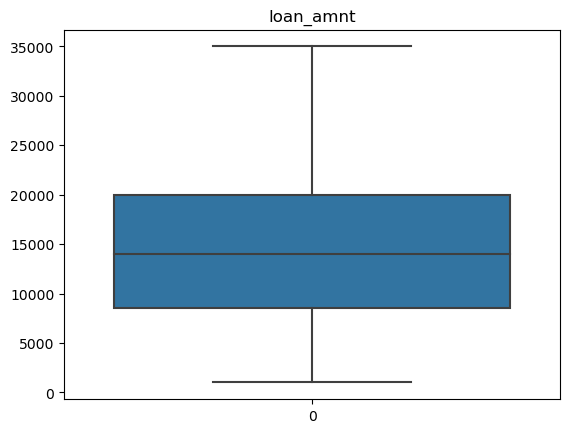

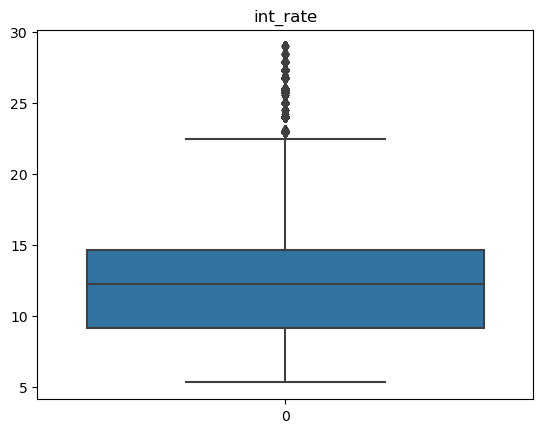

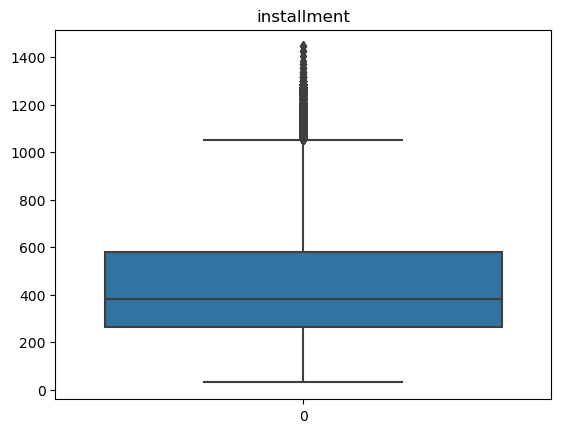

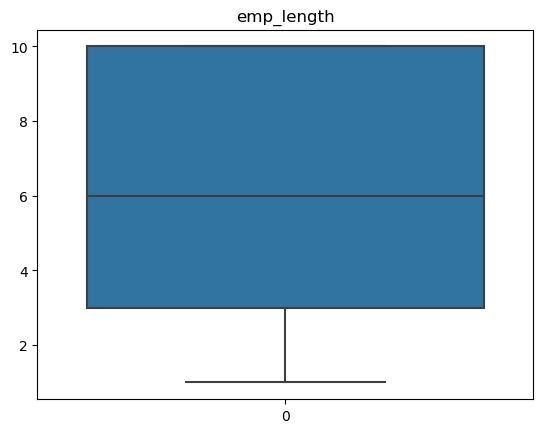

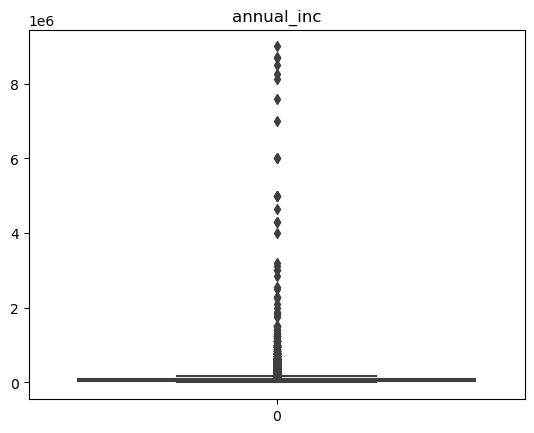

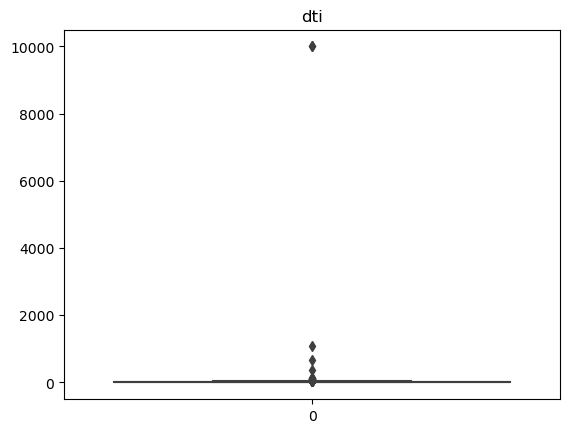

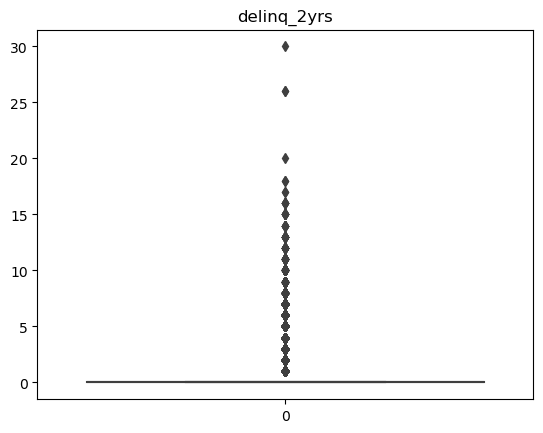

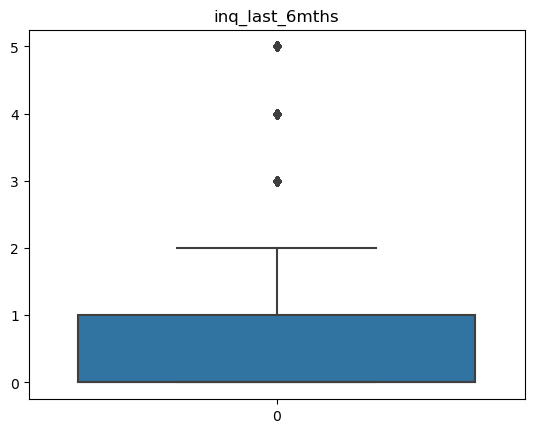

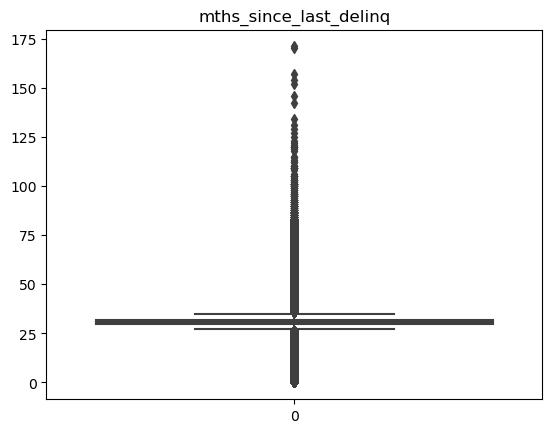

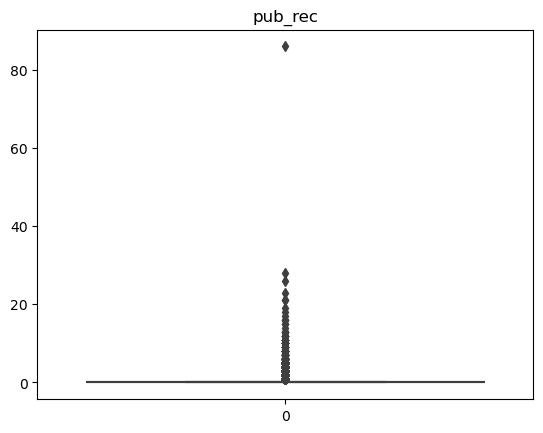

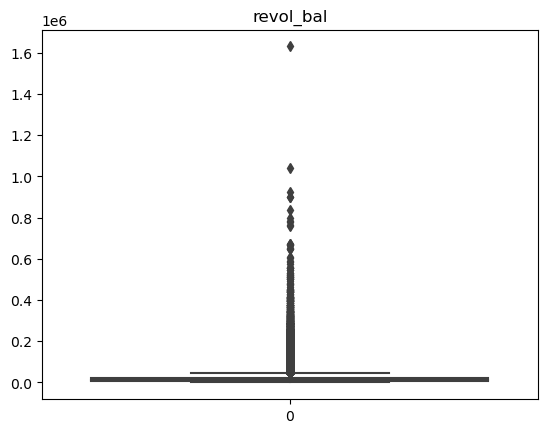

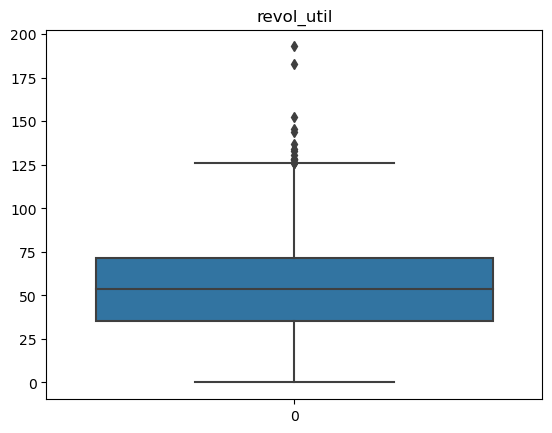

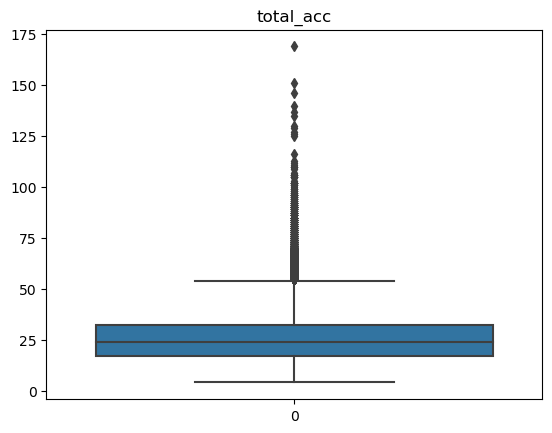

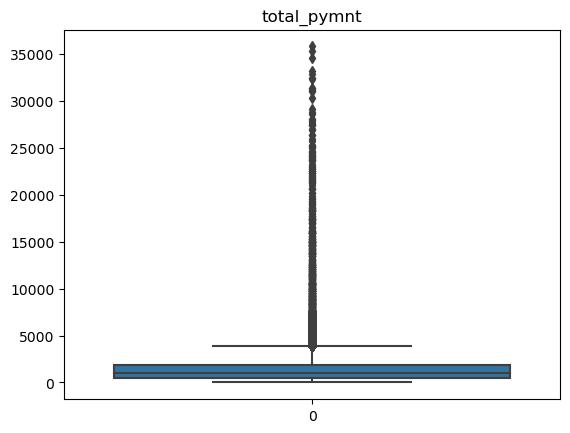

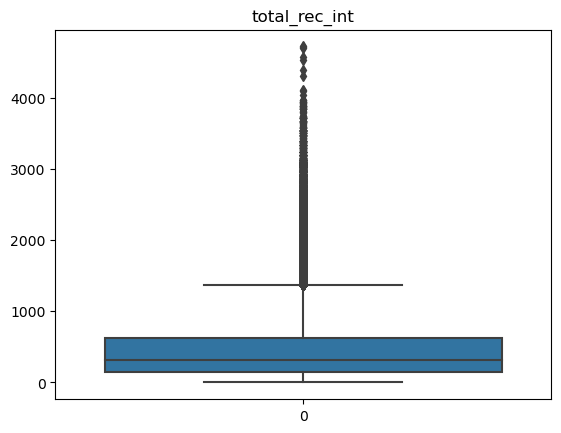

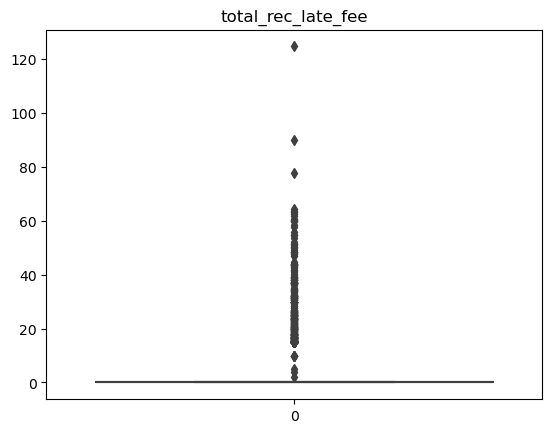

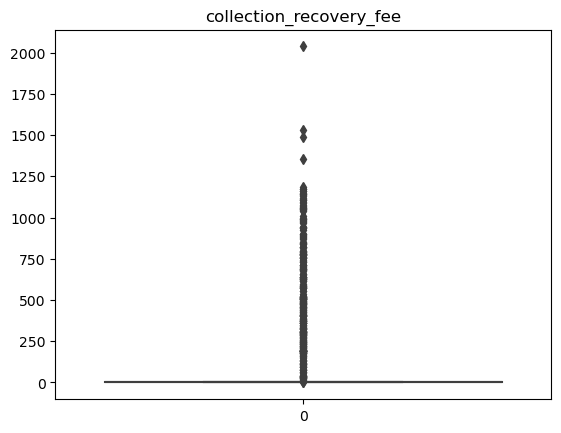

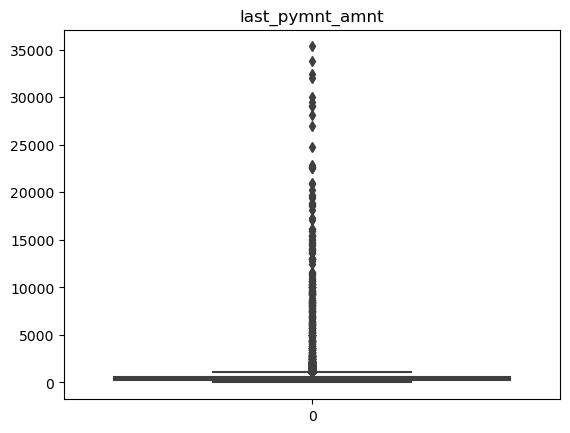

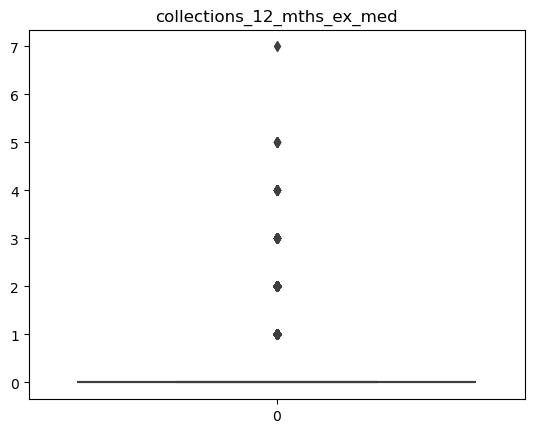

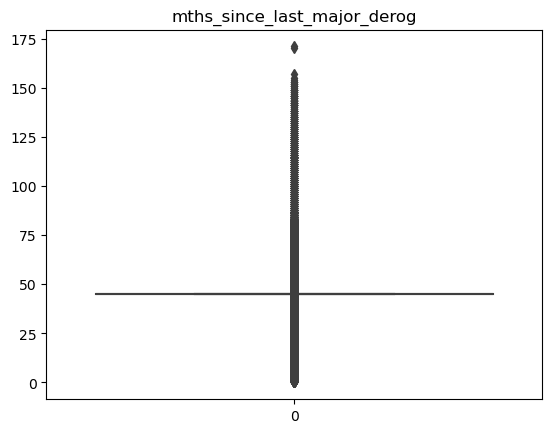

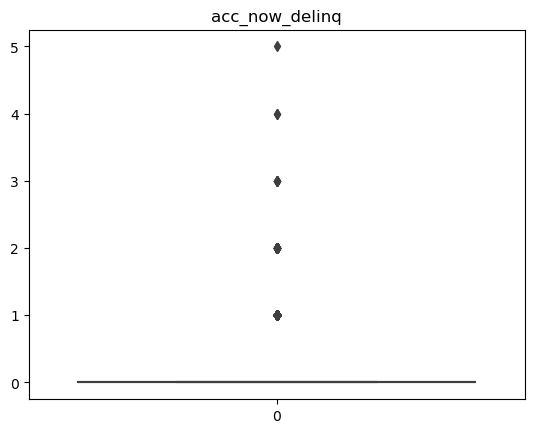

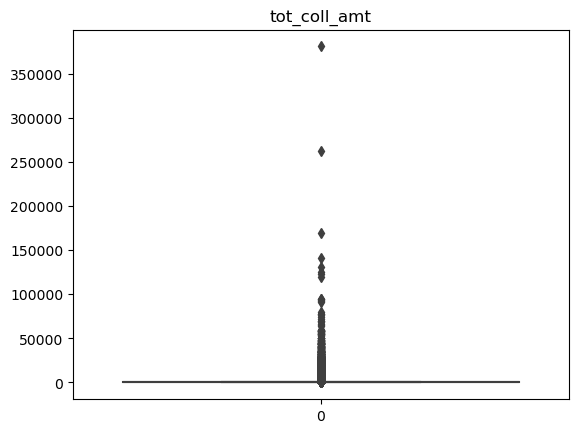

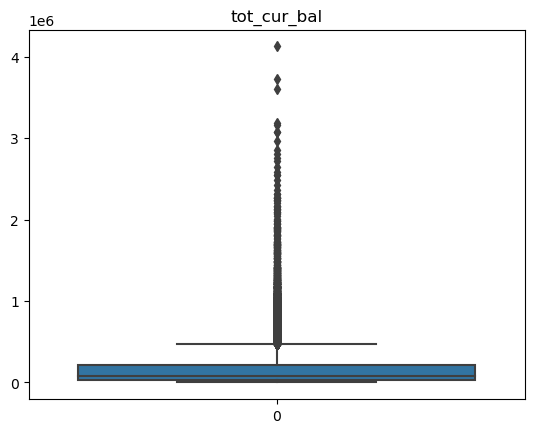

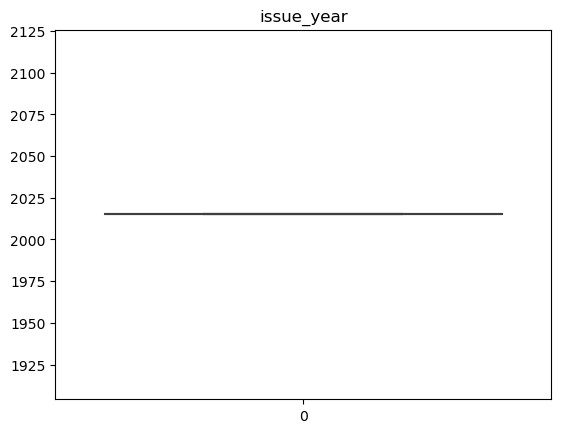

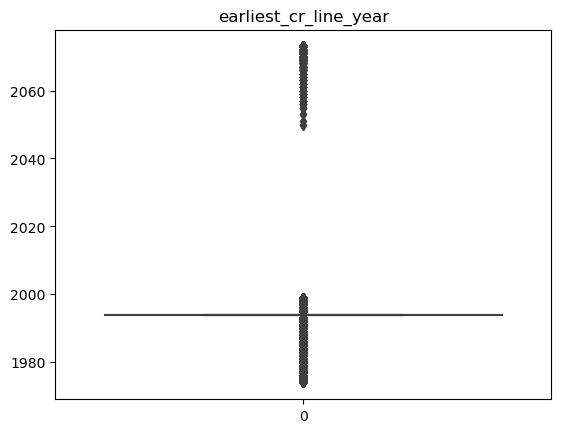

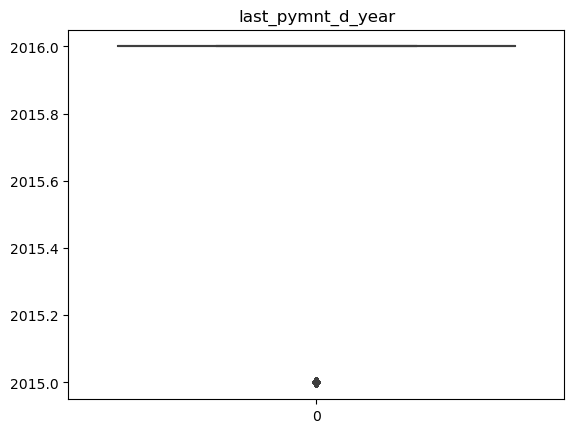

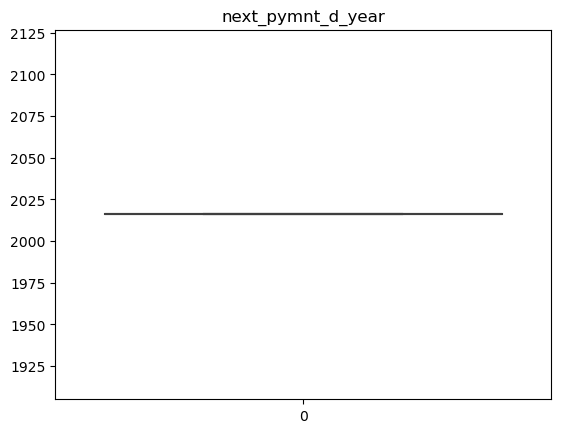

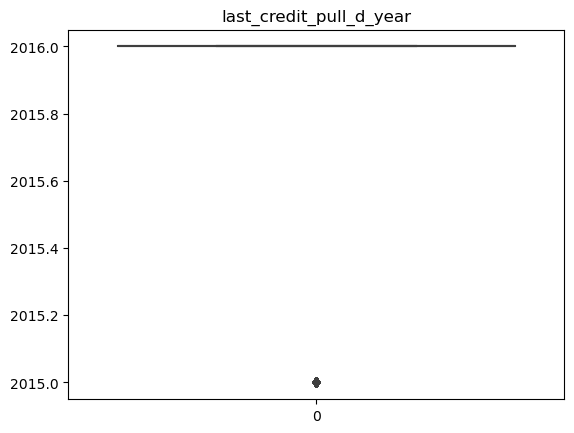

In [91]:
#Outliers
for i in df.select_dtypes(np.number):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

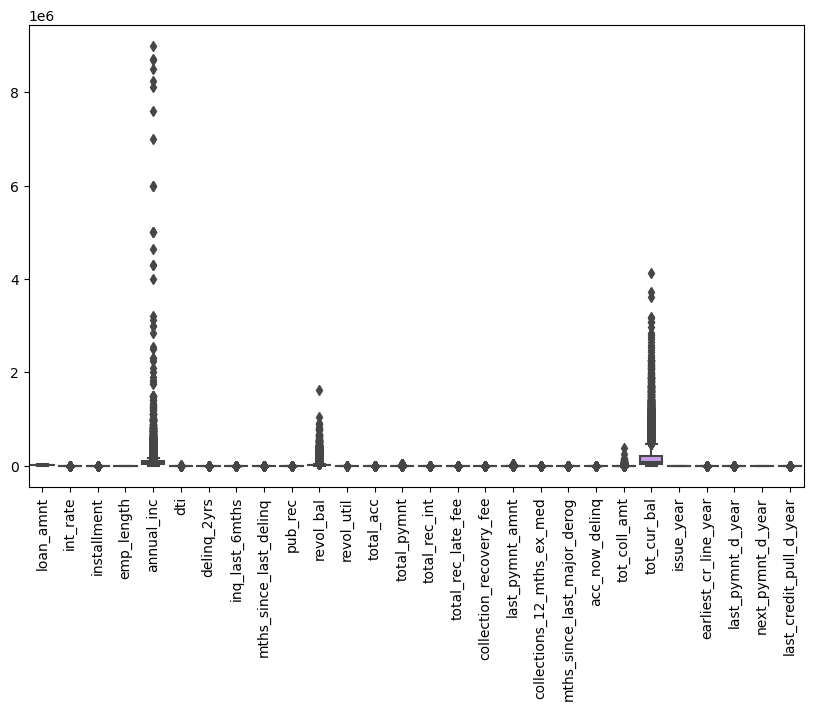

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [93]:
df.shape

(212999, 41)

### Scaling

In [94]:
df.select_dtypes(include=np.number).columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'issue_year', 'earliest_cr_line_year',
       'last_pymnt_d_year', 'next_pymnt_d_year', 'last_credit_pull_d_year'],
      dtype='object')

In [95]:
df['next_pymnt_d_year'].unique()

array([2016.])

In [96]:
df['issue_year'].unique()

array([2015], dtype=int64)

In [97]:
df.drop(['issue_year','next_pymnt_d_year'], axis=1,inplace=True)

In [98]:
df.shape

(212999, 39)

In [99]:
num_data= df.select_dtypes(include=np.number)
num_data

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,earliest_cr_line_year,last_pymnt_d_year,last_credit_pull_d_year
0,20000,12.29,667.06,1.0,65000.00,20.72,0,1,31.0,0,...,0.0,0.00,0,45.0,0,0,52303,1994.0,2016.0,2016.0
1,11000,12.69,369.00,7.0,40000.00,24.57,0,0,36.0,1,...,0.0,10059.00,0,79.0,0,332,175731,1994.0,2015.0,2016.0
2,7000,9.99,225.84,6.0,32000.00,32.41,0,1,31.0,0,...,0.0,225.84,0,45.0,0,0,202012,1994.0,2015.0,2016.0
3,10000,10.99,327.34,10.0,48000.00,30.98,0,2,31.0,0,...,0.0,327.34,0,45.0,0,0,108235,1999.0,2015.0,2016.0
4,9550,19.99,354.87,6.0,32376.00,32.54,0,3,69.0,0,...,0.0,354.87,0,69.0,0,0,45492,1999.0,2015.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212994,20000,13.33,677.07,5.0,120000.00,9.04,0,0,45.0,0,...,0.0,700.00,0,45.0,0,574,21474,1994.0,2016.0,2016.0
212995,6000,11.53,197.95,10.0,25000.00,2.21,0,2,31.0,1,...,0.0,197.95,0,60.0,0,0,2176,1994.0,2015.0,2016.0
212996,18000,19.19,468.82,1.0,120000.00,7.76,0,1,30.0,0,...,0.0,468.82,1,45.0,0,4404,8414,1994.0,2016.0,2016.0
212997,7050,15.61,246.51,6.0,18614.27,21.53,1,0,5.0,0,...,0.0,246.51,0,45.0,0,0,159660,1985.0,2016.0,2016.0


In [100]:
cat_data= df.select_dtypes(include=object)


In [101]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

num_scaled=ss.fit_transform(num_data)
num_scaled= pd.DataFrame(num_scaled,columns=num_data.columns)


In [102]:
num_scaled

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,earliest_cr_line_year,last_pymnt_d_year,last_credit_pull_d_year
0,0.550651,-0.026276,0.920112,-1.468642,-0.156334,0.042573,-0.377181,0.505032,-0.102693,-0.353802,...,-0.031264,-0.967782,-0.134005,-0.011189,-0.070558,-0.118253,-0.569562,0.003952,0.533592,0.099113
1,-0.494440,0.067856,-0.292213,0.256301,-0.461657,0.163165,-0.377181,-0.655429,0.212065,1.155774,...,-0.031264,21.351838,-0.134005,2.763087,-0.070558,0.031622,0.217224,0.003952,-1.874090,0.099113
2,-0.958925,-0.567535,-0.874500,-0.031189,-0.559361,0.408735,-0.377181,0.505032,-0.102693,-0.353802,...,-0.031264,-0.466672,-0.134005,-0.011189,-0.070558,-0.118253,0.384751,0.003952,-1.874090,0.099113
3,-0.610561,-0.332205,-0.461660,1.118773,-0.363954,0.363943,-0.377181,1.665492,-0.102693,-0.353802,...,-0.031264,-0.241456,-0.134005,-0.011189,-0.070558,-0.118253,-0.213026,0.639097,-1.874090,0.099113
4,-0.662816,1.785763,-0.349685,-0.031189,-0.554769,0.412807,-0.377181,2.825953,2.289468,-0.353802,...,-0.031264,-0.180371,-0.134005,1.947123,-0.070558,-0.118253,-0.612978,0.639097,-1.874090,0.099113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212994,0.550651,0.218467,0.960827,-0.318680,0.515377,-0.323275,-0.377181,-0.655429,0.778630,-0.353802,...,-0.031264,0.585428,-0.134005,-0.011189,-0.070558,0.140868,-0.766080,0.003952,0.533592,0.099113
212995,-1.075046,-0.205127,-0.987940,1.118773,-0.644851,-0.537209,-0.377181,1.665492,-0.102693,1.155774,...,-0.031264,-0.528556,-0.134005,1.212756,-0.070558,-0.118253,-0.889094,0.003952,-1.874090,0.099113
212996,0.318408,1.597500,0.113794,-1.468642,0.515377,-0.363368,-0.377181,0.505032,-0.165644,-0.353802,...,-0.031264,0.072469,6.057538,-0.011189,-0.070558,1.869845,-0.849330,0.003952,0.533592,0.099113
212997,-0.953119,0.755019,-0.790427,-0.031189,-0.722840,0.067945,0.708351,-0.655429,-1.739435,-0.353802,...,-0.031264,-0.420808,-0.134005,-0.011189,-0.070558,-0.118253,0.114780,-1.139308,0.533592,0.099113


### Encoding

In [103]:
cat_data.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month'],
      dtype='object')

In [104]:
df['term'] = df['term'].apply(lambda x: 0 if x == '36 months' else 1)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df['application_type'] = df['application_type'].apply(lambda x: 0 if x == 'JOINT' else 1)
df['initial_list_status'] = df['initial_list_status'].apply(lambda x: 0 if x == 'w' else 1)

In [105]:
cols= df.select_dtypes(include=object).columns
cols

Index(['grade', 'home_ownership', 'verification_status', 'title',
       'issue_month', 'earliest_cr_line_month', 'last_pymnt_d_month',
       'next_pymnt_d_month', 'last_credit_pull_d_month'],
      dtype='object')

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols:
    df[i] = le.fit_transform(df[i])

In [107]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_coll_amt,tot_cur_bal,issue_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,next_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,20000,1,12.29,667.06,2,1.0,2,65000.0,1,1,...,0,52303,11,1994.0,10,2016.0,4,0,2016.0,4
1,11000,1,12.69,369.00,2,7.0,1,40000.0,1,1,...,332,175731,11,1994.0,10,2015.0,10,0,2016.0,4
2,7000,1,9.99,225.84,1,6.0,1,32000.0,1,1,...,0,202012,11,1994.0,10,2015.0,10,0,2016.0,4
3,10000,1,10.99,327.34,1,10.0,1,48000.0,1,1,...,0,108235,11,1999.0,10,2015.0,10,0,2016.0,4
4,9550,1,19.99,354.87,4,6.0,3,32376.0,2,1,...,0,45492,11,1999.0,9,2015.0,10,0,2016.0,4


In [108]:
df.dtypes

loan_amnt                        int64
term                             int64
int_rate                       float64
installment                    float64
grade                            int32
emp_length                     float64
home_ownership                   int32
annual_inc                     float64
verification_status              int32
loan_status                      int64
title                            int32
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
mths_since_last_delinq         float64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
initial_list_status              int64
total_pymnt                    float64
total_rec_int                  float64
total_rec_late_fee             float64
collection_recovery_fee        float64
last_pymnt_amnt                float64
collections_12_mths_ex_me

### Train Test Split

In [109]:
columns = ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month']
non_num_cols = df[columns]
# Concatenating the non-numeric columns with the scaled numerical columns
scaled_df = pd.concat([non_num_cols, num_scaled], axis=1)

In [110]:
cat_data.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month'],
      dtype='object')

In [111]:
scaled_df

,term,grade,home_ownership,verification_status,loan_status,title,initial_list_status,application_type,issue_month,earliest_cr_line_month,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,earliest_cr_line_year,last_pymnt_d_year,last_credit_pull_d_year
0,1,2,2,1,1,3,0,1,11,10,...,-0.031264,-0.967782,-0.134005,-0.011189,-0.070558,-0.118253,-0.569562,0.003952,0.533592,0.099113
1,1,2,1,1,1,3,0,1,11,10,...,-0.031264,21.351838,-0.134005,2.763087,-0.070558,0.031622,0.217224,0.003952,-1.874090,0.099113
2,1,1,1,1,1,3,1,1,11,10,...,-0.031264,-0.466672,-0.134005,-0.011189,-0.070558,-0.118253,0.384751,0.003952,-1.874090,0.099113
3,1,1,1,1,1,2,1,1,11,10,...,-0.031264,-0.241456,-0.134005,-0.011189,-0.070558,-0.118253,-0.213026,0.639097,-1.874090,0.099113
4,1,4,3,2,1,3,0,1,11,9,...,-0.031264,-0.180371,-0.134005,1.947123,-0.070558,-0.118253,-0.612978,0.639097,-1.874090,0.099113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212994,1,2,3,1,0,3,0,1,5,10,...,-0.031264,0.585428,-0.134005,-0.011189,-0.070558,0.140868,-0.766080,0.003952,0.533592,0.099113
212995,1,1,3,0,0,2,0,1,5,10,...,-0.031264,-0.528556,-0.134005,1.212756,-0.070558,-0.118253,-0.889094,0.003952,-1.874090,0.099113
212996,1,4,3,1,0,3,0,1,5,10,...,-0.031264,0.072469,6.057538,-0.011189,-0.070558,1.869845,-0.849330,0.003952,0.533592,0.099113
212997,1,3,1,2,0,10,0,1,5,7,...,-0.031264,-0.420808,-0.134005,-0.011189,-0.070558,-0.118253,0.114780,-1.139308,0.533592,0.099113


In [112]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_coll_amt,tot_cur_bal,issue_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,next_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,20000,1,12.29,667.06,2,1.0,2,65000.0,1,1,...,0,52303,11,1994.0,10,2016.0,4,0,2016.0,4
1,11000,1,12.69,369.00,2,7.0,1,40000.0,1,1,...,332,175731,11,1994.0,10,2015.0,10,0,2016.0,4
2,7000,1,9.99,225.84,1,6.0,1,32000.0,1,1,...,0,202012,11,1994.0,10,2015.0,10,0,2016.0,4
3,10000,1,10.99,327.34,1,10.0,1,48000.0,1,1,...,0,108235,11,1999.0,10,2015.0,10,0,2016.0,4
4,9550,1,19.99,354.87,4,6.0,3,32376.0,2,1,...,0,45492,11,1999.0,9,2015.0,10,0,2016.0,4


In [113]:
X = scaled_df.drop('loan_status', axis=1)
y = scaled_df['loan_status']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

### Statistical Tests

In [115]:
import scipy.stats as st

In [116]:
cor_test= num_data.columns
print("Below is the list of important features :")
for i in cor_test:
    teststats,pvalue  =  st.pearsonr(df[i],df['loan_status'].astype(int))
    if pvalue < 0.05 :
        print("Pvalue of {} is {}".format(i, pvalue))
        


Below is the list of important features :
Pvalue of int_rate is 0.0
Pvalue of installment is 0.008982271329814608
Pvalue of emp_length is 6.537760835712503e-09
Pvalue of annual_inc is 9.007776262462442e-07
Pvalue of dti is 0.002156324024478517
Pvalue of inq_last_6mths is 8.997809050636864e-54
Pvalue of revol_bal is 3.34399637605017e-05
Pvalue of revol_util is 1.8401765141348714e-11
Pvalue of total_pymnt is 2.915587511676188e-131
Pvalue of total_rec_int is 1.1016375825662132e-165
Pvalue of total_rec_late_fee is 0.0
Pvalue of collection_recovery_fee is 0.0
Pvalue of last_pymnt_amnt is 0.008455050037952551
Pvalue of tot_cur_bal is 3.1627277604643632e-21
Pvalue of last_pymnt_d_year is 0.0
Pvalue of last_credit_pull_d_year is 0.0


In [117]:
num_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'earliest_cr_line_year', 'last_pymnt_d_year',
       'last_credit_pull_d_year'],
      dtype='object')

#### Chi- Square test

In [118]:
chi_test= cat_data.columns
for i in chi_test:
  teststats,pvalue,dof,expected_freq = st.chi2_contingency(pd.crosstab(df[i],
                                                                      df['loan_status']))
  if pvalue < 0.05 :
        print("Pvalue of {} is {}".format(i, pvalue))


Pvalue of grade is 0.0
Pvalue of home_ownership is 6.240046119620101e-35
Pvalue of verification_status is 2.4686541649285164e-21
Pvalue of loan_status is 0.0
Pvalue of title is 3.2649936627265303e-38
Pvalue of initial_list_status is 1.5839215533310026e-230
Pvalue of application_type is 0.027517805905079695
Pvalue of issue_month is 0.0
Pvalue of earliest_cr_line_month is 2.0616484955248597e-05
Pvalue of last_pymnt_d_month is 0.0
Pvalue of next_pymnt_d_month is 6.316108798854022e-82
Pvalue of last_credit_pull_d_month is 0.0


In [119]:
columns_to_drop = ['loan_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 
                   'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                   'acc_now_delinq', 'tot_coll_amt', 'earliest_cr_line_year', 'term']

X = X.drop(columns=columns_to_drop)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [121]:
X_c = sm.add_constant(X)

### Model Building

### Verification of Multi-collinearity

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
vif["features"] = X_c.columns

In [123]:
vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
0,768.034225,const
12,19.021078,int_rate
1,17.912845,grade
9,4.149627,last_pymnt_d_month
26,4.119008,last_pymnt_d_year
21,3.778180,total_rec_int
20,3.404943,total_pymnt
13,2.131641,installment
25,1.804087,tot_cur_bal
24,1.726019,last_pymnt_amnt


In [124]:
X = X.drop(columns=['int_rate'])
X_c = X_c.drop(columns=['int_rate'])

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
vif["features"] = X_c.columns

In [126]:
vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
0,734.891257,const
9,4.148617,last_pymnt_d_month
25,4.117343,last_pymnt_d_year
20,3.659104,total_rec_int
19,3.370225,total_pymnt
12,2.130821,installment
1,1.875402,grade
24,1.803798,tot_cur_bal
23,1.724286,last_pymnt_amnt
17,1.441284,revol_bal


### Train Test Split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [128]:
logreg_result = LogisticRegression()
logreg_result.fit(X_train, y_train)

LogisticRegression()

In [129]:
def performance(y,X,model):
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True)
    print(classification_report(y,y_pred))
    print("AUC score:", roc_auc_score(y,ypred_prob))
    print( "f1_score:",f1_score(y,y_pred))
    

Training performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147204
           1       0.97      0.71      0.82      1895

    accuracy                           1.00    149099
   macro avg       0.98      0.85      0.91    149099
weighted avg       1.00      1.00      1.00    149099

AUC score: 0.9737020919544532
f1_score: 0.817737003058104


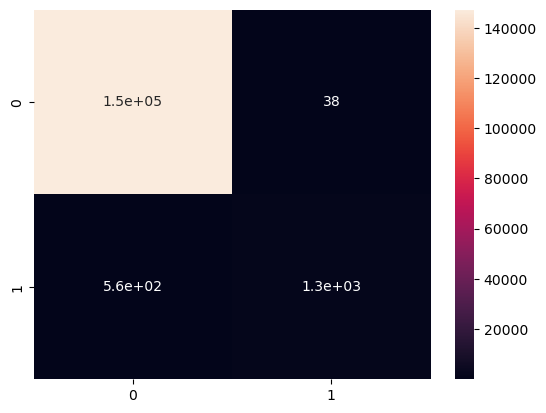

In [130]:
print("Training performance")
performance(y_train,X_train,logreg_result)

Testing performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63022
           1       0.97      0.71      0.82       878

    accuracy                           1.00     63900
   macro avg       0.99      0.85      0.91     63900
weighted avg       1.00      1.00      1.00     63900

AUC score: 0.9699961231313158
f1_score: 0.8190224570673712


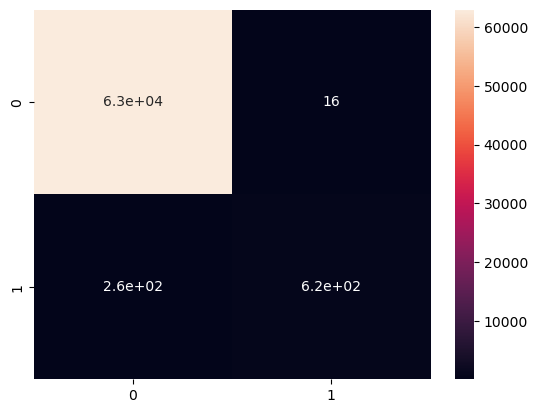

In [131]:
print("Testing performance")
performance(y_test,X_test,logreg_result)

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  


estimator = LogisticRegression()


rfe = RFE(estimator, n_features_to_select=5)  

# Fit RFE to your data and get the selected features
X_selected = rfe.fit_transform(X, y) 


selected_indices = rfe.get_support(indices=True)


print("Selected feature indices:", selected_indices)


Selected feature indices: [ 5  8  9 21 24]


In [133]:
# Get the names of selected features from their indices
selected_feature_names = [X.columns[i] for i in selected_indices]

# Print the names of selected features
print("Selected feature names:", selected_feature_names)


Selected feature names: ['application_type', 'last_pymnt_d_month', 'next_pymnt_d_month', 'collection_recovery_fee', 'last_pymnt_d_year']


### Logit Model

In [134]:
X_train_const=sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train_const)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.020388
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               149099
Model:                          Logit   Df Residuals:                   149072
Method:                           MLE   Df Model:                           26
Date:                Wed, 06 Mar 2024   Pseudo R-squ.:                  0.7007
Time:                        07:37:57   Log-Likelihood:                -3039.8
converged:                      False   LL-Null:                       -10155.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -178.1196   1.49e+06     -0.000      1.000   -2.91e+06    2.91e+06
grade                  

### Oversampling (50-50)

In [135]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [136]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Instantiate SMOTE with desired proportion
smote = SMOTE(sampling_strategy=0.5)  # 50/50 proportion



# Apply SMOTE
X, y = smote.fit_resample(X, y)

# Now X_resampled and y_resampled contain the balanced dataset


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    147246
           1       0.99      0.95      0.97     73491

    accuracy                           0.98    220737
   macro avg       0.98      0.97      0.98    220737
weighted avg       0.98      0.98      0.98    220737

AUC score: 0.9769799349607574
f1_score: 0.9713886080682463


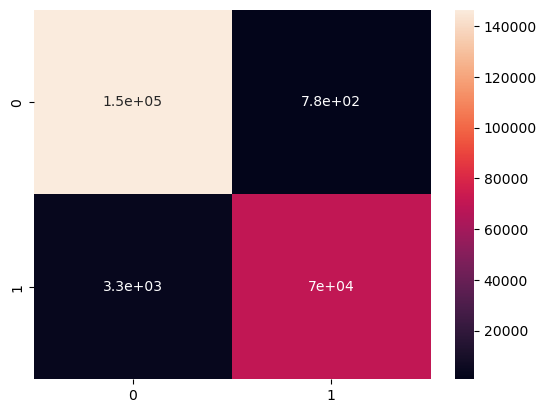

In [139]:
performance(y_train,X_train,DT_model)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     62980
           1       0.99      0.96      0.97     31622

    accuracy                           0.98     94602
   macro avg       0.98      0.98      0.98     94602
weighted avg       0.98      0.98      0.98     94602

AUC score: 0.9779981915224011
f1_score: 0.9729295008926993


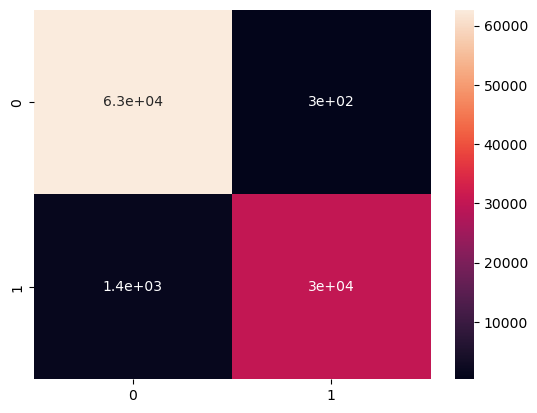

In [140]:
performance(y_test,X_test, DT_model)

In [141]:
imp=DT_model.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp


,column,importance
9,last_pymnt_d_month,0.945097
36,last_credit_pull_d_year,0.054903
35,last_pymnt_d_year,0.000000
27,collection_recovery_fee,0.000000
21,revol_bal,0.000000
22,revol_util,0.000000
23,total_acc,0.000000
24,total_pymnt,0.000000
25,total_rec_int,0.000000
26,total_rec_late_fee,0.000000


<Axes: xlabel='importance', ylabel='column'>

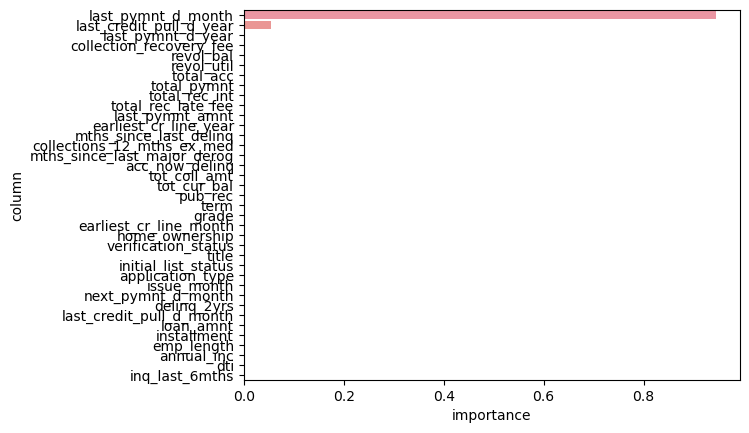

In [142]:
sns.barplot(y = 'column', x='importance', data = df_imp )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147246
           1       1.00      1.00      1.00     73491

    accuracy                           1.00    220737
   macro avg       1.00      1.00      1.00    220737
weighted avg       1.00      1.00      1.00    220737

AUC score: 0.9999999982441964
f1_score: 0.9999727857832932


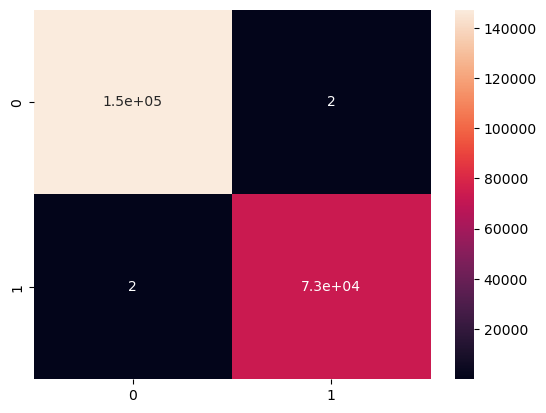

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 42)

rf.fit(X_train, y_train);
performance(y_train, X_train, rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62980
           1       1.00      1.00      1.00     31622

    accuracy                           1.00     94602
   macro avg       1.00      1.00      1.00     94602
weighted avg       1.00      1.00      1.00     94602

AUC score: 0.9999983374788073
f1_score: 0.9995255716861182


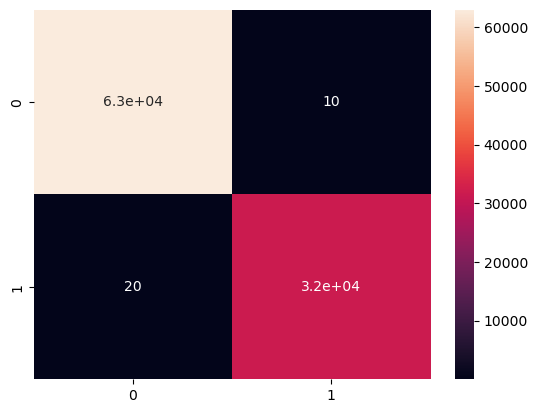

In [144]:
performance(y_test, X_test, rf)

In [145]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62980
           1       1.00      1.00      1.00     31622

    accuracy                           1.00     94602
   macro avg       1.00      1.00      1.00     94602
weighted avg       1.00      1.00      1.00     94602

AUC score: 0.9999959288064542
f1_score: 0.999857682759057


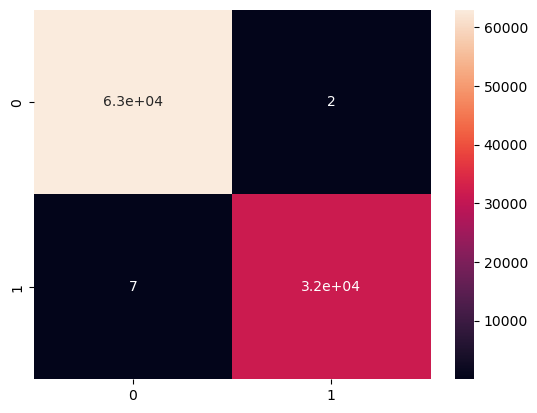

In [146]:
performance(y_test,X_test,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147246
           1       1.00      1.00      1.00     73491

    accuracy                           1.00    220737
   macro avg       1.00      1.00      1.00    220737
weighted avg       1.00      1.00      1.00    220737

AUC score: 0.9999999943629463
f1_score: 0.9999795889208662


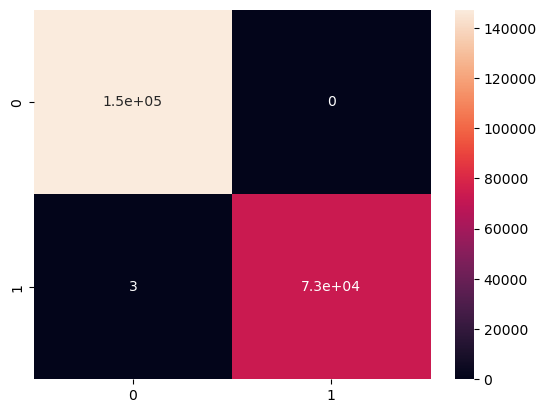

In [147]:
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    147246
           1       0.93      0.85      0.89     73491

    accuracy                           0.93    220737
   macro avg       0.93      0.91      0.92    220737
weighted avg       0.93      0.93      0.93    220737

AUC score: 0.9718685002443209
f1_score: 0.889317129711933


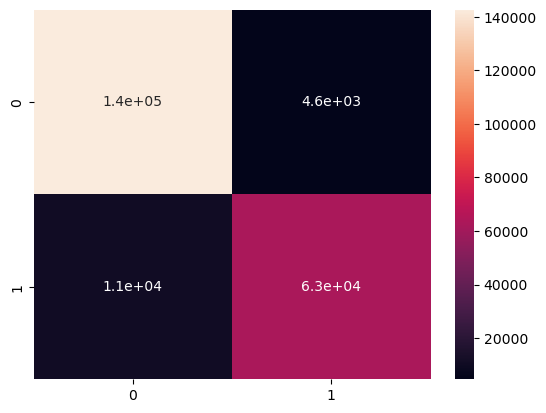

In [148]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(X_train, y_train)
performance(y_train,X_train,gnb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     62980
           1       0.93      0.85      0.89     31622

    accuracy                           0.93     94602
   macro avg       0.93      0.91      0.92     94602
weighted avg       0.93      0.93      0.93     94602

AUC score: 0.9726283954421994
f1_score: 0.8913719008264464


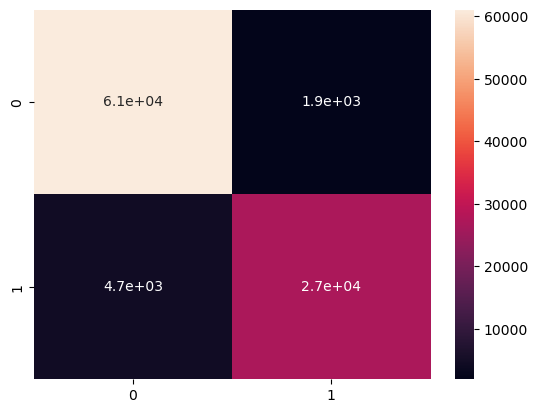

In [149]:
performance(y_test,X_test,gnb)

### Undersampling (50-50)

In [150]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [151]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(sampling_strategy=0.5)  # 50/50 proportion

# Apply undersampling
X, y = rus.fit_resample(X, y)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [153]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3890
           1       0.99      0.97      0.98      1933

    accuracy                           0.99      5823
   macro avg       0.99      0.98      0.98      5823
weighted avg       0.99      0.99      0.99      5823

AUC score: 0.9832435430095873
f1_score: 0.977510460251046


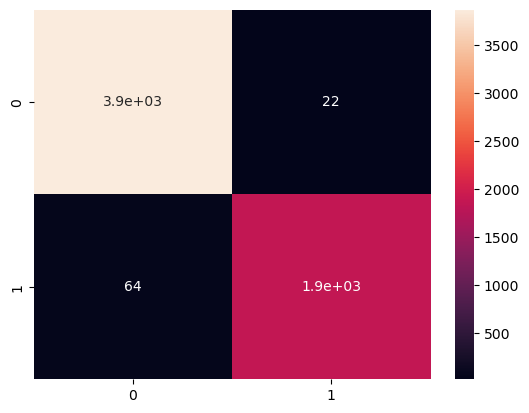

In [154]:
performance(y_train,X_train,DT_model2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1656
           1       0.99      0.95      0.97       840

    accuracy                           0.98      2496
   macro avg       0.98      0.97      0.98      2496
weighted avg       0.98      0.98      0.98      2496

AUC score: 0.9741208017023233
f1_score: 0.967820279295689


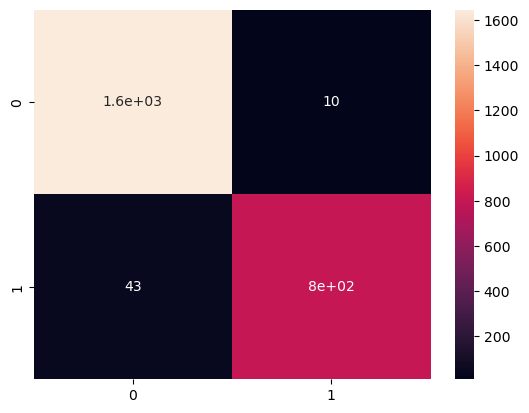

In [155]:
performance(y_test,X_test,DT_model2)

In [156]:
imp=DT_model2.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

,column,importance
9,last_pymnt_d_month,0.955956
36,last_credit_pull_d_year,0.044044
35,last_pymnt_d_year,0.000000
27,collection_recovery_fee,0.000000
21,revol_bal,0.000000
22,revol_util,0.000000
23,total_acc,0.000000
24,total_pymnt,0.000000
25,total_rec_int,0.000000
26,total_rec_late_fee,0.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3890
           1       1.00      1.00      1.00      1933

    accuracy                           1.00      5823
   macro avg       1.00      1.00      1.00      5823
weighted avg       1.00      1.00      1.00      5823

AUC score: 1.0
f1_score: 0.9997412677878396


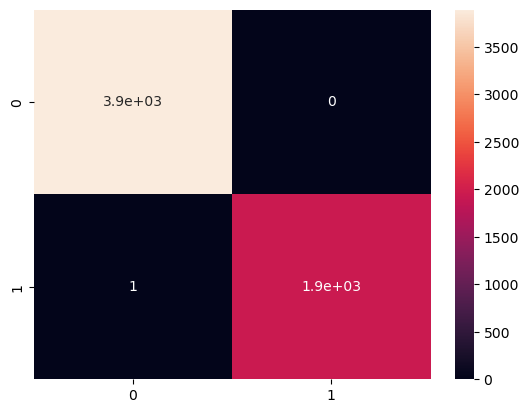

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators = 10, random_state = 42)

rf2.fit(X_train, y_train);
performance(y_train, X_train, rf2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1656
           1       1.00      0.97      0.98       840

    accuracy                           0.99      2496
   macro avg       0.99      0.98      0.99      2496
weighted avg       0.99      0.99      0.99      2496

AUC score: 0.9994953416149068
f1_score: 0.9825195901145267


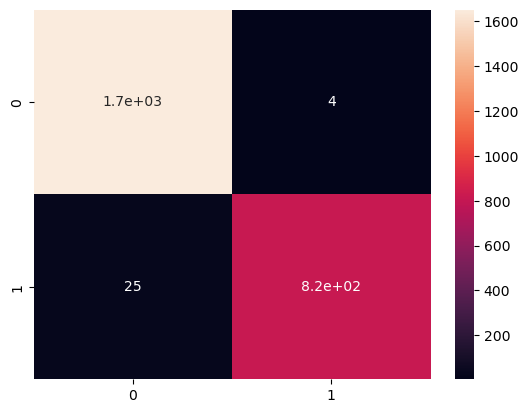

In [158]:
performance(y_test, X_test, rf2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3890
           1       1.00      1.00      1.00      1933

    accuracy                           1.00      5823
   macro avg       1.00      1.00      1.00      5823
weighted avg       1.00      1.00      1.00      5823

AUC score: 0.9999998670101352
f1_score: 0.9997412677878396


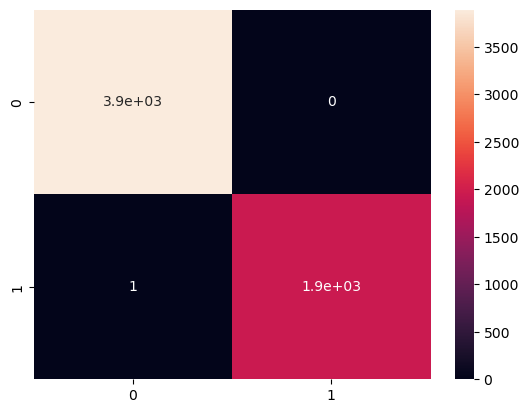

In [159]:
from xgboost import XGBClassifier
xgb_model2 = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model2.fit(X_train, y_train)
performance(y_train, X_train, xgb_model2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1656
           1       1.00      0.99      1.00       840

    accuracy                           1.00      2496
   macro avg       1.00      1.00      1.00      2496
weighted avg       1.00      1.00      1.00      2496

AUC score: 0.999858379342075
f1_score: 0.9970149253731343


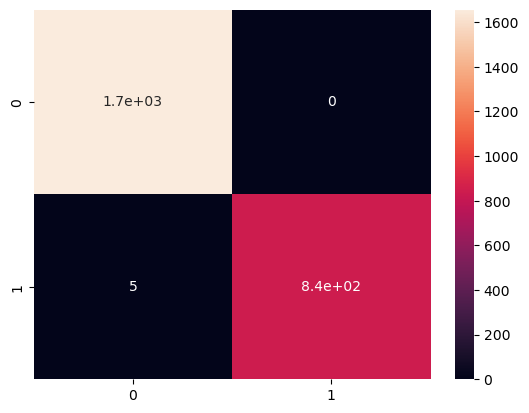

In [160]:
performance(y_test, X_test, xgb_model2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3890
           1       0.94      0.78      0.85      1933

    accuracy                           0.91      5823
   macro avg       0.92      0.88      0.89      5823
weighted avg       0.91      0.91      0.91      5823

AUC score: 0.9731928339741228
f1_score: 0.853257790368272


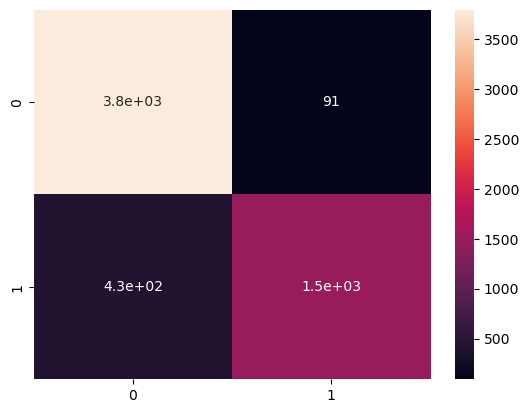

In [161]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()


gnb2.fit(X_train, y_train)
performance(y_train,X_train,gnb2)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1656
           1       0.93      0.74      0.82       840

    accuracy                           0.89      2496
   macro avg       0.91      0.86      0.87      2496
weighted avg       0.90      0.89      0.89      2496

AUC score: 0.9616905337014033
f1_score: 0.8233731739707835


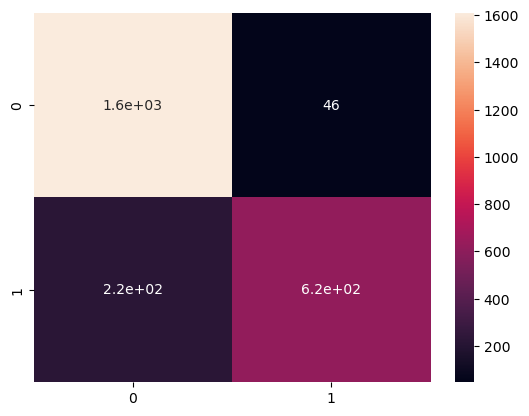

In [162]:
performance(y_test,X_test,gnb2)

### Oversampling (70-30)


In [163]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [164]:
smote = SMOTE(sampling_strategy=0.7)  
# Apply SMOTE
X, y = smote.fit_resample(X, y)

In [165]:
y.value_counts(normalize=True)*100

0    58.823562
1    41.176438
Name: loan_status, dtype: float64

In [166]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [167]:
DT = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    147359
           1       0.92      0.98      0.95    102809

    accuracy                           0.96    250168
   macro avg       0.95      0.96      0.96    250168
weighted avg       0.96      0.96      0.96    250168

AUC score: 0.9689757258923523
f1_score: 0.9503554752575142


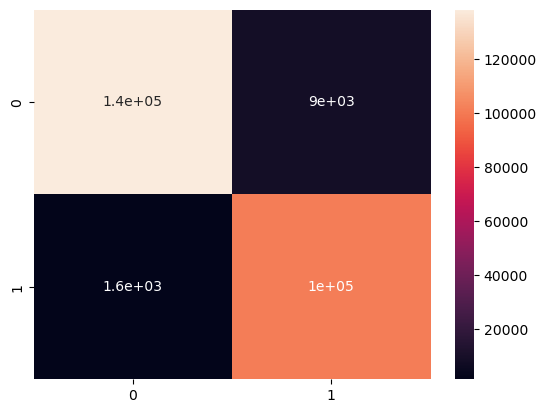

In [168]:
performance(y_train,X_train,DT)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     62867
           1       0.92      0.99      0.95     44349

    accuracy                           0.96    107216
   macro avg       0.95      0.96      0.96    107216
weighted avg       0.96      0.96      0.96    107216

AUC score: 0.969482925141335
f1_score: 0.9515618025237074


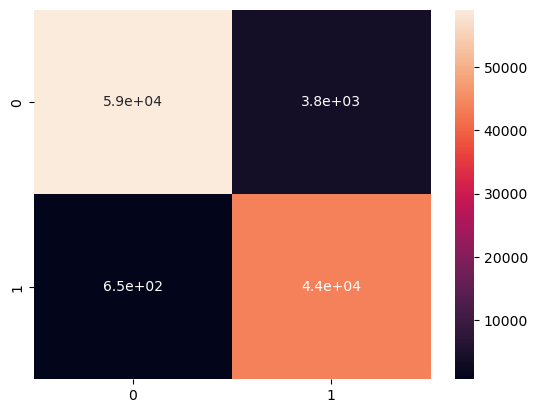

In [169]:
performance(y_test,X_test,DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147359
           1       1.00      1.00      1.00    102809

    accuracy                           1.00    250168
   macro avg       1.00      1.00      1.00    250168
weighted avg       1.00      1.00      1.00    250168

AUC score: 0.9999999285140561
f1_score: 0.9999270509621977


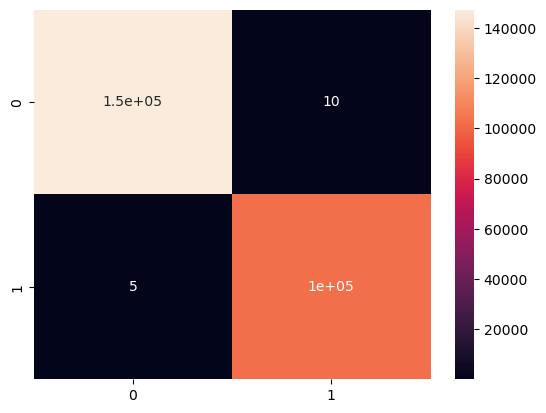

In [170]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_train, X_train, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     44349

    accuracy                           1.00    107216
   macro avg       1.00      1.00      1.00    107216
weighted avg       1.00      1.00      1.00    107216

AUC score: 0.999941878819422
f1_score: 0.9994927005242096


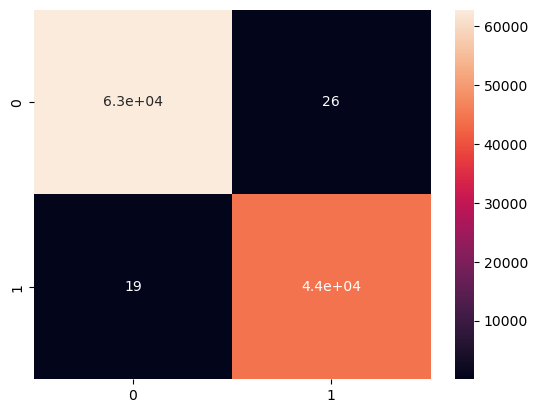

In [171]:
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147359
           1       1.00      1.00      1.00    102809

    accuracy                           1.00    250168
   macro avg       1.00      1.00      1.00    250168
weighted avg       1.00      1.00      1.00    250168

AUC score: 1.0
f1_score: 0.9999902731304957


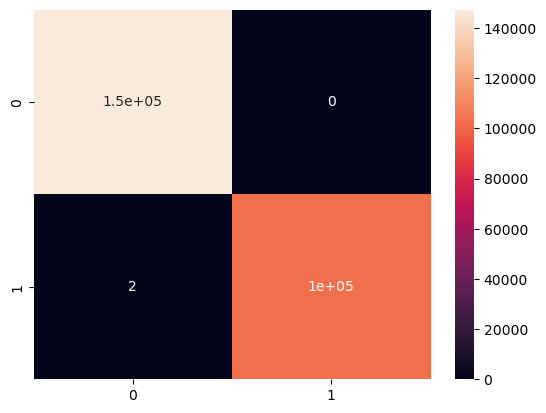

In [172]:
from xgboost import XGBClassifier
xgb2 = XGBClassifier(max_depth = 10, gamma = 1)


xgb2.fit(X_train, y_train)
performance(y_train, X_train, xgb2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     44349

    accuracy                           1.00    107216
   macro avg       1.00      1.00      1.00    107216
weighted avg       1.00      1.00      1.00    107216

AUC score: 0.9999993156601941
f1_score: 0.9998872553440967


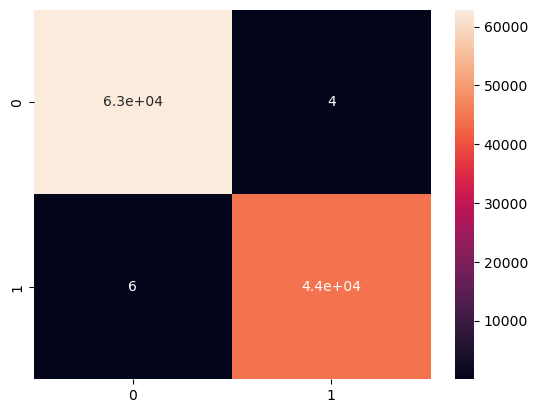

In [173]:
performance(y_test, X_test, xgb2)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94    147359
           1       0.93      0.89      0.91    102809

    accuracy                           0.93    250168
   macro avg       0.93      0.92      0.93    250168
weighted avg       0.93      0.93      0.93    250168

AUC score: 0.9714414622716734
f1_score: 0.9112848538035023


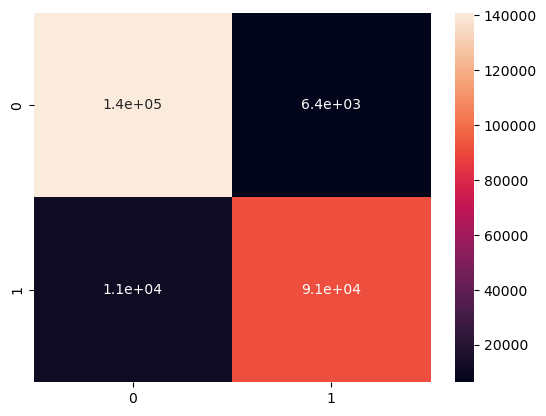

In [174]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()


gnb_model.fit(X_train, y_train)
performance(y_train,X_train,gnb_model)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     62867
           1       0.94      0.89      0.91     44349

    accuracy                           0.93    107216
   macro avg       0.93      0.92      0.93    107216
weighted avg       0.93      0.93      0.93    107216

AUC score: 0.9717983739901854
f1_score: 0.9135083278430829


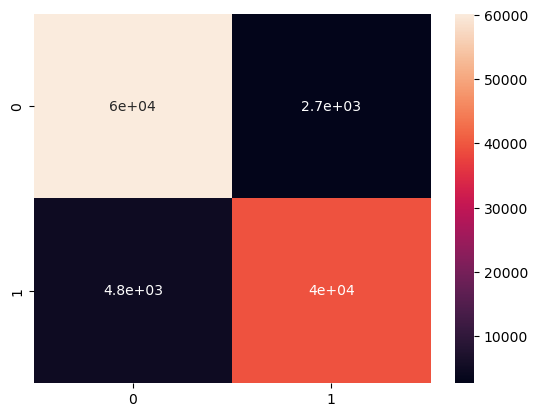

In [175]:
performance(y_test,X_test,gnb_model)

### Undersampling (70-30)

In [314]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [315]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(sampling_strategy=0.3)  

# Apply undersampling
X,y = rus.fit_resample(X,y)


In [316]:
y.value_counts(normalize=True)*100

0    76.922437
1    23.077563
Name: loan_status, dtype: float64

In [317]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [318]:
DT2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6464
           1       0.98      0.96      0.97      1947

    accuracy                           0.99      8411
   macro avg       0.99      0.98      0.98      8411
weighted avg       0.99      0.99      0.99      8411

AUC score: 0.980816434397677
f1_score: 0.972987012987013


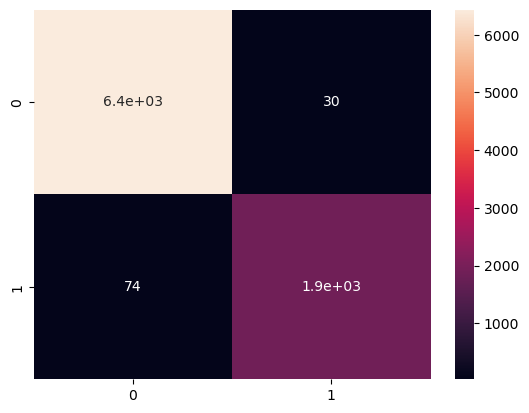

In [319]:
performance(y_train, X_train, DT2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2779
           1       0.99      0.96      0.97       826

    accuracy                           0.99      3605
   macro avg       0.99      0.98      0.98      3605
weighted avg       0.99      0.99      0.99      3605

AUC score: 0.9798804506646615
f1_score: 0.9736034376918355


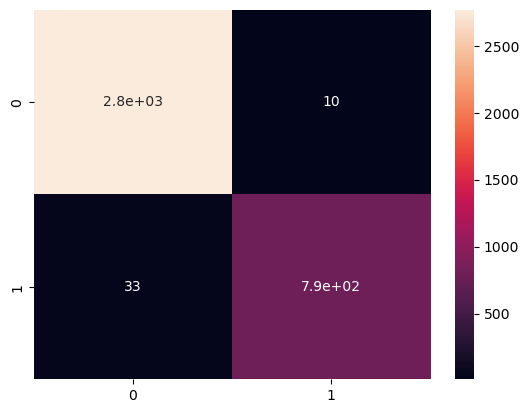

In [320]:
performance(y_test, X_test, DT2)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2779
           1       0.99      0.98      0.99       826

    accuracy                           0.99      3605
   macro avg       0.99      0.99      0.99      3605
weighted avg       0.99      0.99      0.99      3605

AUC score: 0.9990644552232368
f1_score: 0.9853836784409258


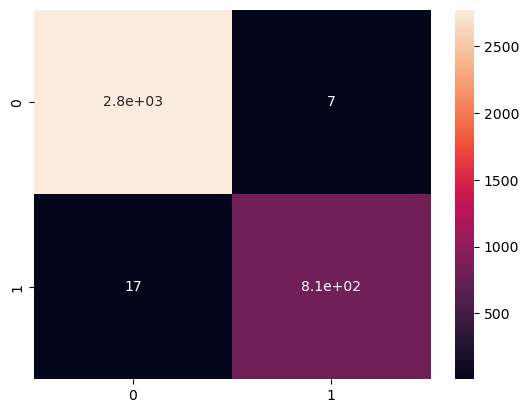

In [321]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6464
           1       1.00      1.00      1.00      1947

    accuracy                           1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411

AUC score: 0.9999911008049958
f1_score: 0.9984567901234569


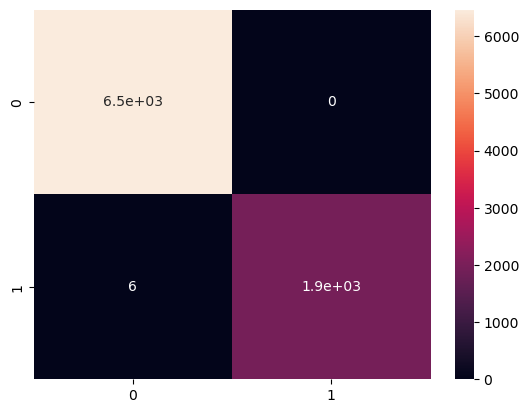

In [322]:
performance(y_train, X_train, rf_model)

In [323]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6464
           1       1.00      1.00      1.00      1947

    accuracy                           1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411

AUC score: 1.0
f1_score: 0.999743128692525


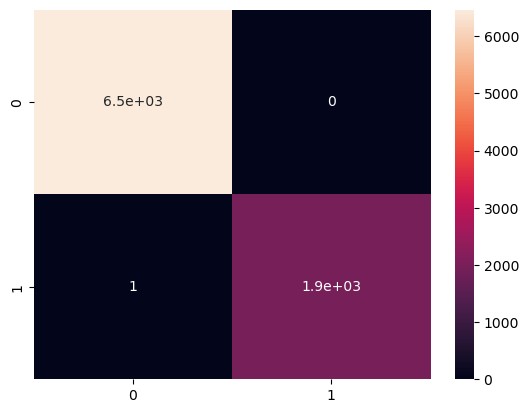

In [324]:
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2779
           1       1.00      1.00      1.00       826

    accuracy                           1.00      3605
   macro avg       1.00      1.00      1.00      3605
weighted avg       1.00      1.00      1.00      3605

AUC score: 0.9999812673222814
f1_score: 0.998180715585203


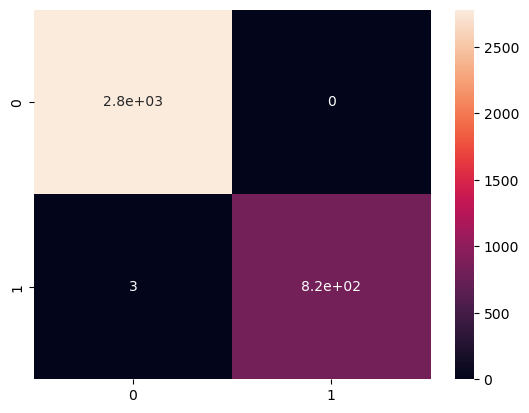

In [326]:
performance(y_test,X_test,xgb_model)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6464
           1       0.90      0.67      0.77      1947

    accuracy                           0.91      8411
   macro avg       0.90      0.82      0.85      8411
weighted avg       0.91      0.91      0.90      8411

AUC score: 0.9702538050415211
f1_score: 0.7662835249042146


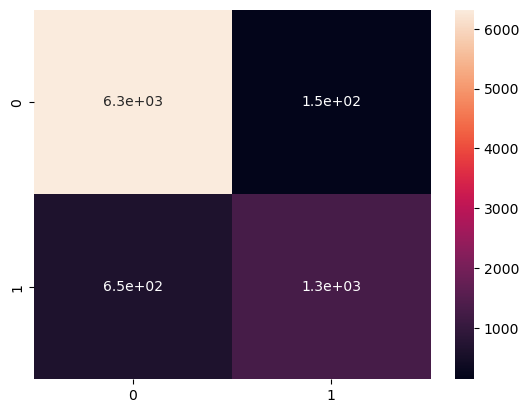

In [255]:
from sklearn.naive_bayes import GaussianNB
gnb_model2 = GaussianNB()


gnb_model2.fit(X_train, y_train)
performance(y_train,X_train,gnb_model2)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2779
           1       0.89      0.66      0.75       826

    accuracy                           0.90      3605
   macro avg       0.90      0.82      0.85      3605
weighted avg       0.90      0.90      0.90      3605

AUC score: 0.9698303690686026
f1_score: 0.754874651810585


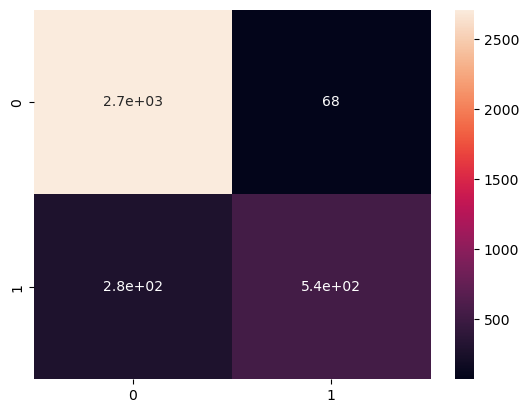

In [256]:
performance(y_test,X_test,gnb_model2)

### Oversampling (60-40)

In [257]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [258]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.6) 
X,y = smote.fit_resample(X,y)

In [259]:
y.value_counts(normalize=True)

0    0.625001
1    0.374999
Name: loan_status, dtype: float64

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [261]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    147147
           1       0.99      0.96      0.97     88305

    accuracy                           0.98    235452
   macro avg       0.98      0.97      0.98    235452
weighted avg       0.98      0.98      0.98    235452

AUC score: 0.9772825328796113
f1_score: 0.9726042405475692


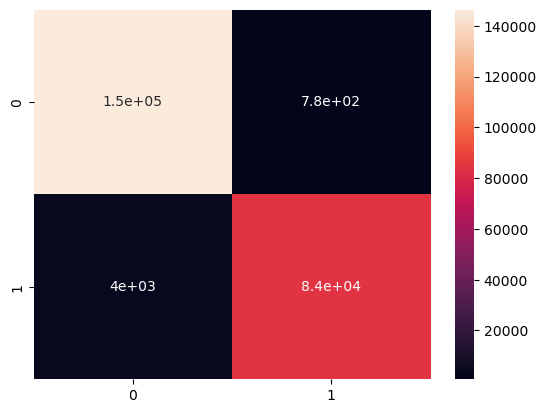

In [262]:
performance(y_train,X_train,DT_model)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     63079
           1       0.99      0.95      0.97     37830

    accuracy                           0.98    100909
   macro avg       0.98      0.97      0.98    100909
weighted avg       0.98      0.98      0.98    100909

AUC score: 0.976887338849127
f1_score: 0.9725200711245218


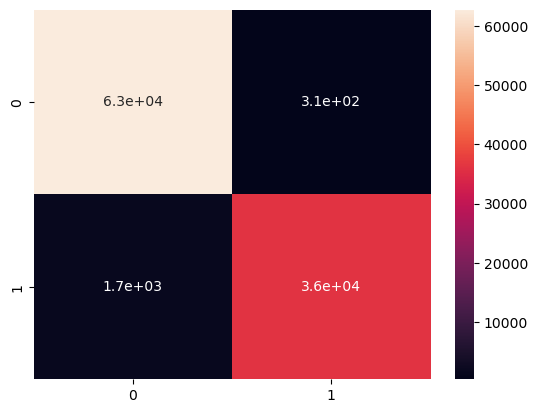

In [263]:
performance(y_test,X_test, DT_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63079
           1       1.00      1.00      1.00     37830

    accuracy                           1.00    100909
   macro avg       1.00      1.00      1.00    100909
weighted avg       1.00      1.00      1.00    100909

AUC score: 0.9999485858434375
f1_score: 0.9993390439932317


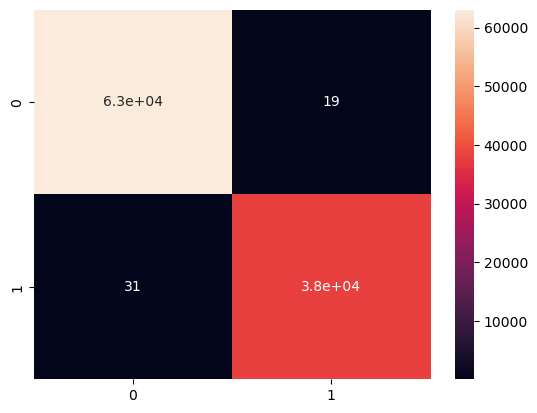

In [264]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147147
           1       1.00      1.00      1.00     88305

    accuracy                           1.00    235452
   macro avg       1.00      1.00      1.00    235452
weighted avg       1.00      1.00      1.00    235452

AUC score: 0.9999999404332023
f1_score: 0.9999433774234462


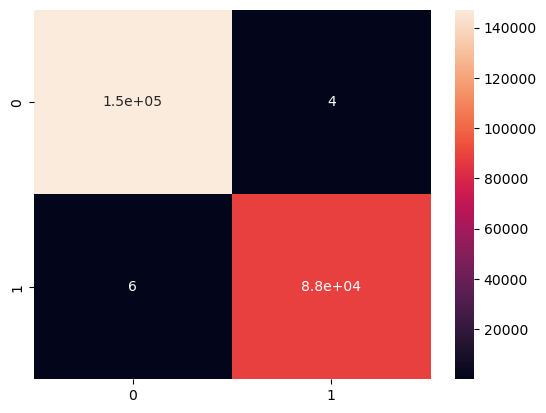

In [265]:
performance(y_train, X_train, rf_model)

In [266]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147147
           1       1.00      1.00      1.00     88305

    accuracy                           1.00    235452
   macro avg       1.00      1.00      1.00    235452
weighted avg       1.00      1.00      1.00    235452

AUC score: 0.9999999998460805
f1_score: 0.9999886754846893


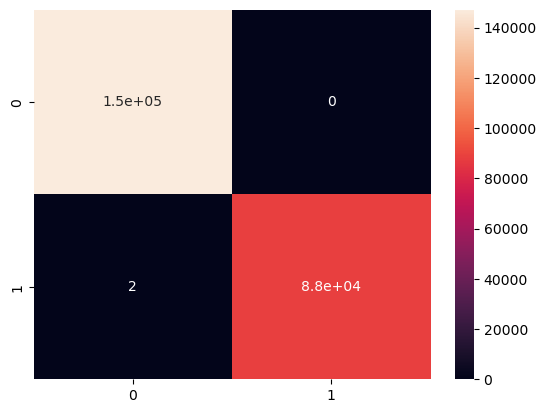

In [267]:
performance(y_train, X_train, xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63079
           1       1.00      1.00      1.00     37830

    accuracy                           1.00    100909
   macro avg       1.00      1.00      1.00    100909
weighted avg       1.00      1.00      1.00    100909

AUC score: 0.9999992896889653
f1_score: 0.9998413747521481


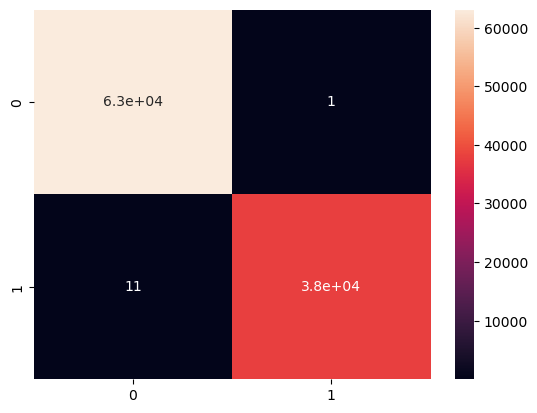

In [268]:
performance(y_test, X_test, xgb_model)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95    147147
           1       0.93      0.88      0.91     88305

    accuracy                           0.93    235452
   macro avg       0.93      0.92      0.93    235452
weighted avg       0.93      0.93      0.93    235452

AUC score: 0.9725186789597129
f1_score: 0.9067531591857613


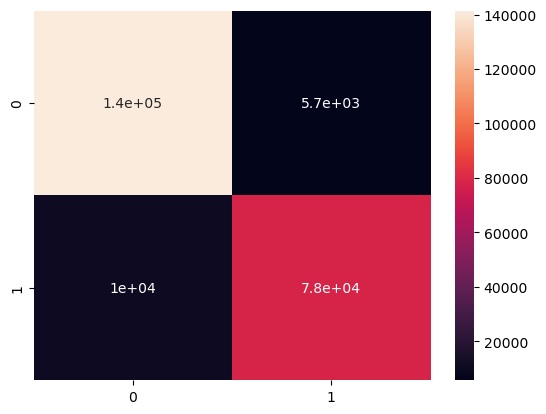

In [269]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
performance(y_train,X_train,gnb)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     63079
           1       0.93      0.88      0.91     37830

    accuracy                           0.93    100909
   macro avg       0.93      0.92      0.93    100909
weighted avg       0.93      0.93      0.93    100909

AUC score: 0.9725010397675407
f1_score: 0.9066384410790859


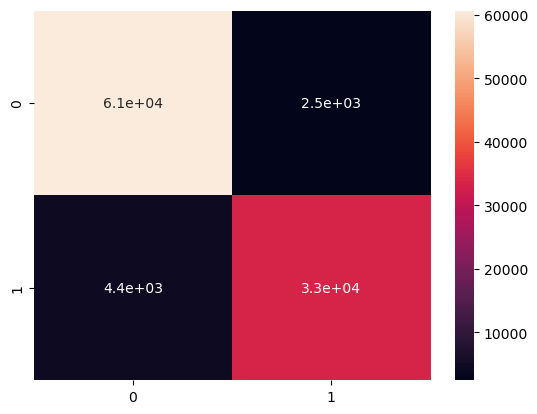

In [270]:
performance(y_test,X_test,gnb)

### Undersampling (60-40)

In [271]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [272]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4)  
X,y = rus.fit_resample(X,y)

In [273]:
y.value_counts(normalize=True)

0    0.714271
1    0.285729
Name: loan_status, dtype: float64

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [275]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4854
           1       0.98      0.96      0.97      1939

    accuracy                           0.98      6793
   macro avg       0.98      0.98      0.98      6793
weighted avg       0.98      0.98      0.98      6793

AUC score: 0.9778195829835103
f1_score: 0.9701726844583988


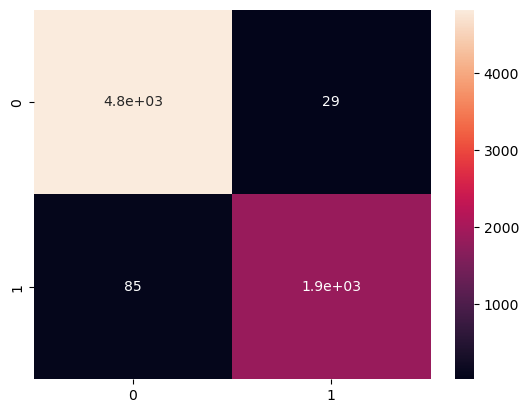

In [276]:
performance(y_train,X_train,DT_model2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2078
           1       0.99      0.97      0.98       834

    accuracy                           0.99      2912
   macro avg       0.99      0.98      0.99      2912
weighted avg       0.99      0.99      0.99      2912

AUC score: 0.9866749526269264
f1_score: 0.9806763285024155


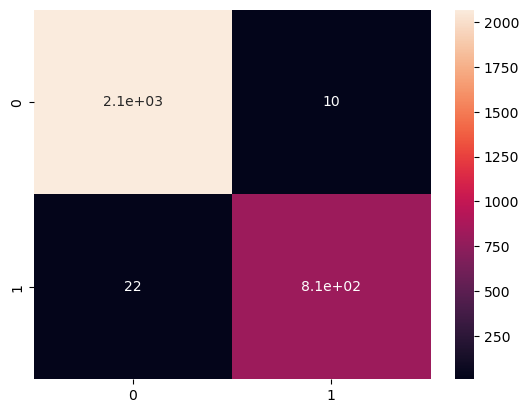

In [277]:
performance(y_test,X_test,DT_model2)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2078
           1       0.99      0.99      0.99       834

    accuracy                           0.99      2912
   macro avg       0.99      0.99      0.99      2912
weighted avg       0.99      0.99      0.99      2912

AUC score: 0.9985874630420783
f1_score: 0.9898386132695757


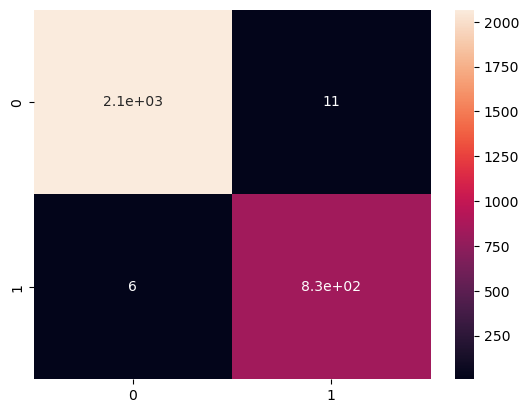

In [278]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4854
           1       1.00      1.00      1.00      1939

    accuracy                           1.00      6793
   macro avg       1.00      1.00      1.00      6793
weighted avg       1.00      1.00      1.00      6793

AUC score: 0.999985284595915
f1_score: 0.9992266047950502


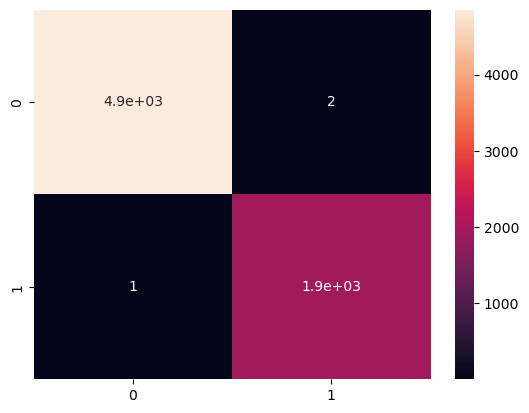

In [279]:
performance(y_train, X_train, rf_model)

In [280]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4854
           1       1.00      1.00      1.00      1939

    accuracy                           1.00      6793
   macro avg       1.00      1.00      1.00      6793
weighted avg       1.00      1.00      1.00      6793

AUC score: 1.0
f1_score: 0.9997420686097498


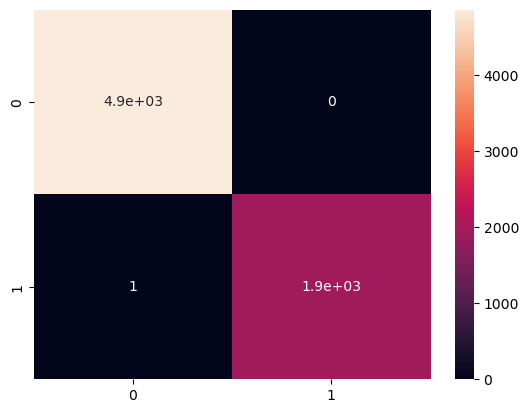

In [281]:
performance(y_train, X_train, xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2078
           1       1.00      1.00      1.00       834

    accuracy                           1.00      2912
   macro avg       1.00      1.00      1.00      2912
weighted avg       1.00      1.00      1.00      2912

AUC score: 0.9999930757992258
f1_score: 0.9994001199760048


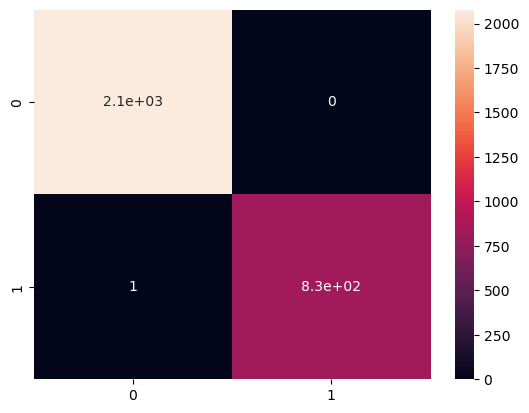

In [282]:
performance(y_test, X_test, xgb_model)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4854
           1       0.93      0.72      0.81      1939

    accuracy                           0.90      6793
   macro avg       0.91      0.85      0.87      6793
weighted avg       0.91      0.90      0.90      6793

AUC score: 0.9699720757942122
f1_score: 0.8120824862038919


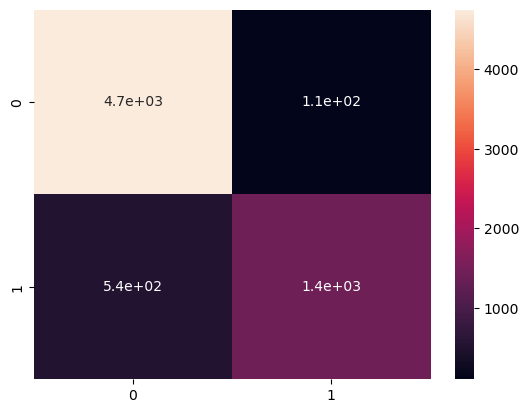

In [283]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
performance(y_train,X_train,gnb2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2078
           1       0.93      0.74      0.82       834

    accuracy                           0.91      2912
   macro avg       0.91      0.86      0.88      2912
weighted avg       0.91      0.91      0.90      2912

AUC score: 0.9734029907931211
f1_score: 0.8195187165775402


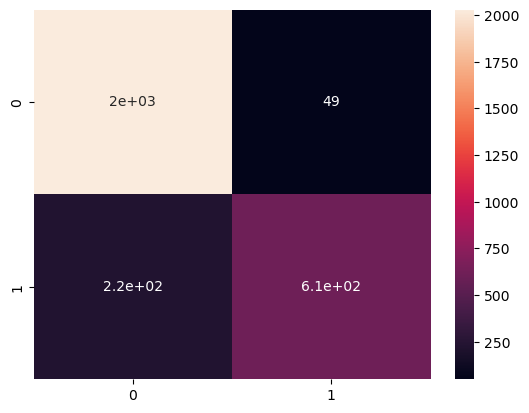

In [284]:
performance(y_test,X_test,gnb2)

### Oversampling (85-15)

In [285]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [286]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.85) 
X,y = smote.fit_resample(X,y)

In [287]:
y.value_counts(normalize=True)

0    0.540541
1    0.459459
Name: loan_status, dtype: float64

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [289]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    147131
           1       0.93      0.99      0.96    125111

    accuracy                           0.96    272242
   macro avg       0.96      0.96      0.96    272242
weighted avg       0.96      0.96      0.96    272242

AUC score: 0.9691610775500139
f1_score: 0.9579976917965518


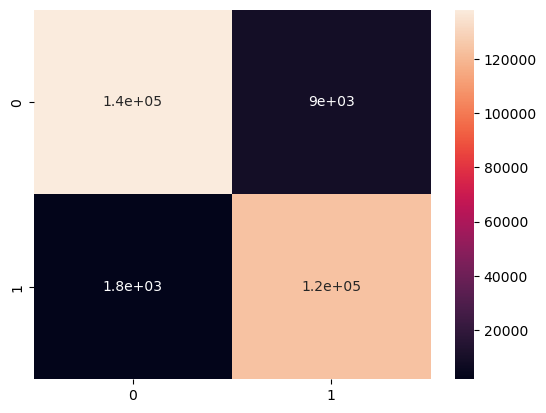

In [290]:
performance(y_train,X_train,DT_model)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     63095
           1       0.93      0.99      0.96     53581

    accuracy                           0.96    116676
   macro avg       0.96      0.96      0.96    116676
weighted avg       0.96      0.96      0.96    116676

AUC score: 0.9690529684401012
f1_score: 0.9580170326231872


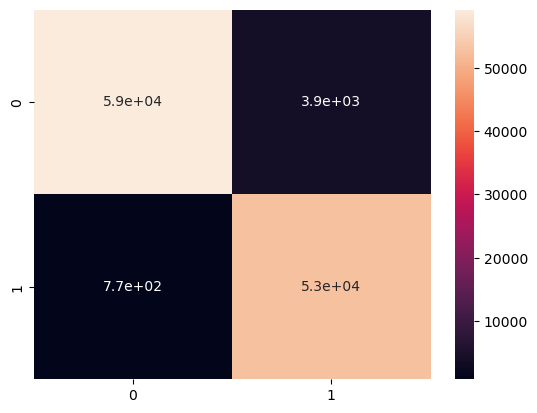

In [291]:
performance(y_test,X_test, DT_model)

In [292]:
imp=DT_model.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

,column,importance
35,last_pymnt_d_year,0.678667
7,issue_month,0.219055
10,next_pymnt_d_month,0.061898
36,last_credit_pull_d_year,0.023474
28,last_pymnt_amnt,0.014437
9,last_pymnt_d_month,0.002469
33,tot_cur_bal,0.000000
32,tot_coll_amt,0.000000
31,acc_now_delinq,0.000000
34,earliest_cr_line_year,0.000000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147131
           1       1.00      1.00      1.00    125111

    accuracy                           1.00    272242
   macro avg       1.00      1.00      1.00    272242
weighted avg       1.00      1.00      1.00    272242

AUC score: 0.9999999990764739
f1_score: 0.9999920070338102


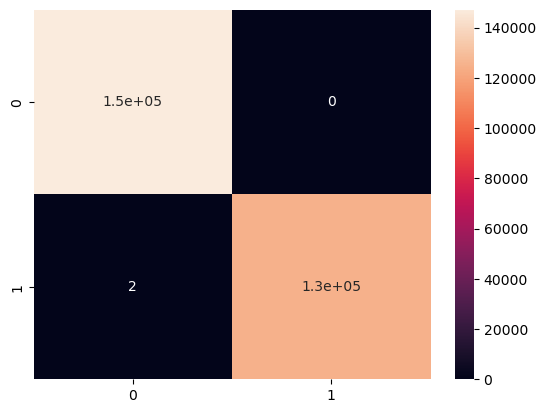

In [293]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63095
           1       1.00      1.00      1.00     53581

    accuracy                           1.00    116676
   macro avg       1.00      1.00      1.00    116676
weighted avg       1.00      1.00      1.00    116676

AUC score: 0.9999994705227901
f1_score: 0.9998506794086904


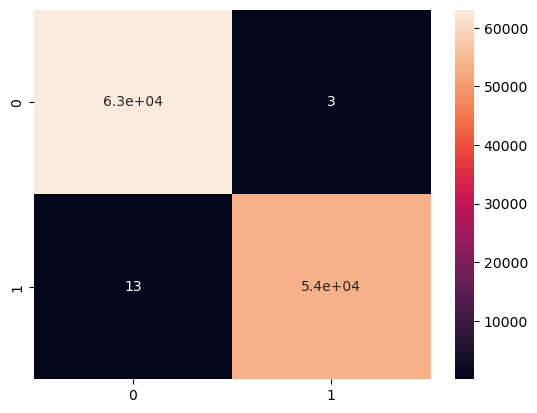

In [294]:
performance(y_test,X_test,xgb_model)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93    147131
           1       0.95      0.89      0.92    125111

    accuracy                           0.93    272242
   macro avg       0.93      0.92      0.93    272242
weighted avg       0.93      0.93      0.93    272242

AUC score: 0.9723713965470263
f1_score: 0.9187878987067194


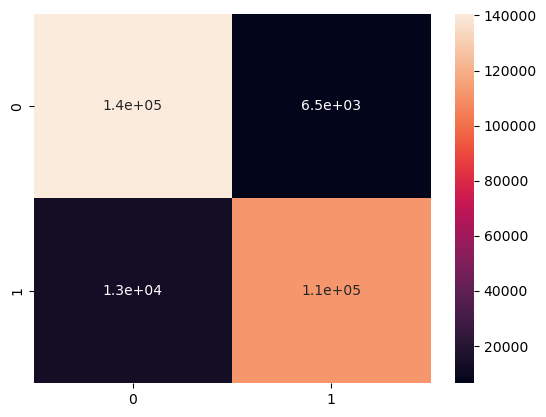

In [295]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
performance(y_train,X_train,gnb)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     63095
           1       0.94      0.89      0.92     53581

    accuracy                           0.93    116676
   macro avg       0.93      0.92      0.93    116676
weighted avg       0.93      0.93      0.93    116676

AUC score: 0.971221938996449
f1_score: 0.9177582999290358


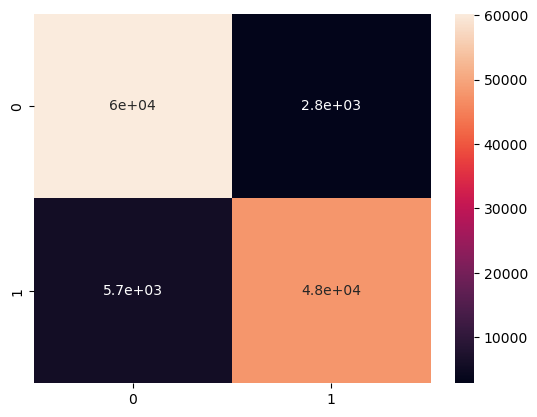

In [296]:
performance(y_test,X_test,gnb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147131
           1       1.00      1.00      1.00    125111

    accuracy                           1.00    272242
   macro avg       1.00      1.00      1.00    272242
weighted avg       1.00      1.00      1.00    272242

AUC score: 0.9999999483096932
f1_score: 0.9999640326583462


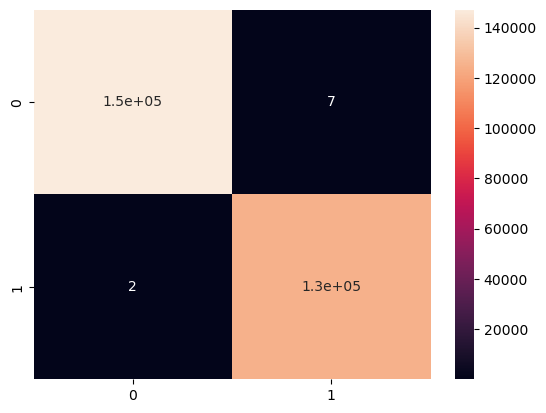

In [297]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_train, X_train, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63095
           1       1.00      1.00      1.00     53581

    accuracy                           1.00    116676
   macro avg       1.00      1.00      1.00    116676
weighted avg       1.00      1.00      1.00    116676

AUC score: 0.9999812834243305
f1_score: 0.9997013643914366


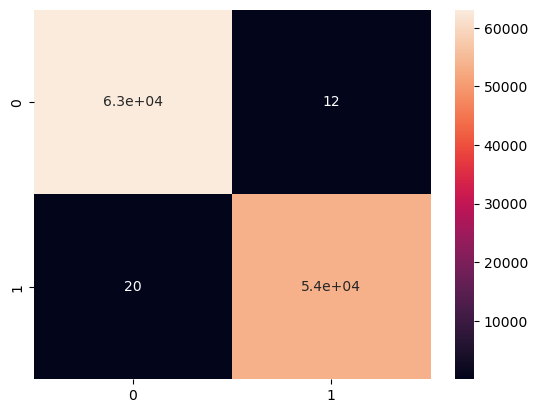

In [298]:
performance(y_test, X_test, rf_model)

### Undersampling (85-15)

In [299]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [300]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.15)  
X,y = rus.fit_resample(X,y)

In [301]:
y.value_counts(normalize=True)

0    0.869561
1    0.130439
Name: loan_status, dtype: float64

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [303]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12921
           1       1.00      0.95      0.97      1960

    accuracy                           0.99     14881
   macro avg       1.00      0.97      0.98     14881
weighted avg       0.99      0.99      0.99     14881

AUC score: 0.9737244897959183
f1_score: 0.9730154571653131


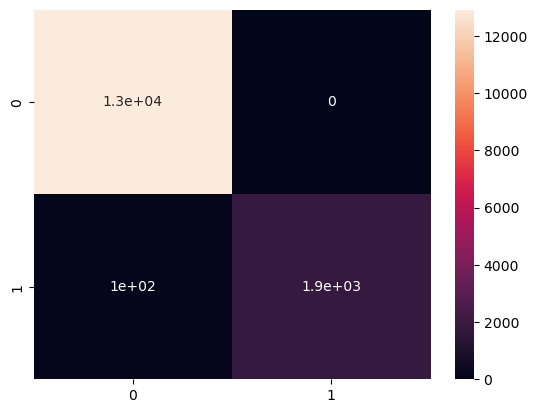

In [304]:
performance(y_train,X_train,DT_model2)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5565
           1       1.00      0.94      0.97       813

    accuracy                           0.99      6378
   macro avg       1.00      0.97      0.98      6378
weighted avg       0.99      0.99      0.99      6378

AUC score: 0.9717097170971709
f1_score: 0.9708860759493672


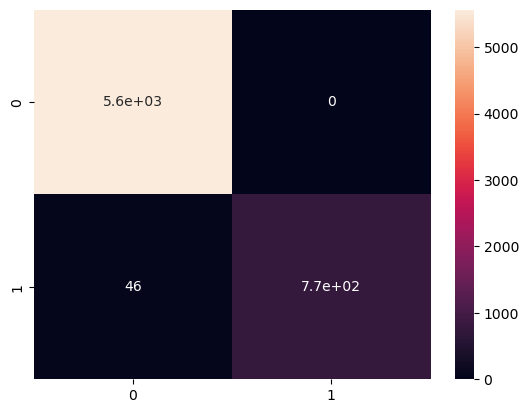

In [305]:
performance(y_test,X_test,DT_model2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12921
           1       0.87      0.68      0.76      1960

    accuracy                           0.94     14881
   macro avg       0.91      0.83      0.86     14881
weighted avg       0.94      0.94      0.94     14881

AUC score: 0.9725664122161518
f1_score: 0.760126400459638


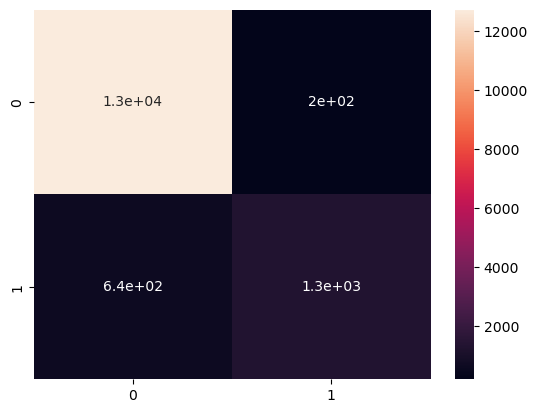

In [306]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
performance(y_train,X_train,gnb2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5565
           1       0.84      0.68      0.75       813

    accuracy                           0.94      6378
   macro avg       0.90      0.83      0.86      6378
weighted avg       0.94      0.94      0.94      6378

AUC score: 0.9759030312675095
f1_score: 0.7518694765465671


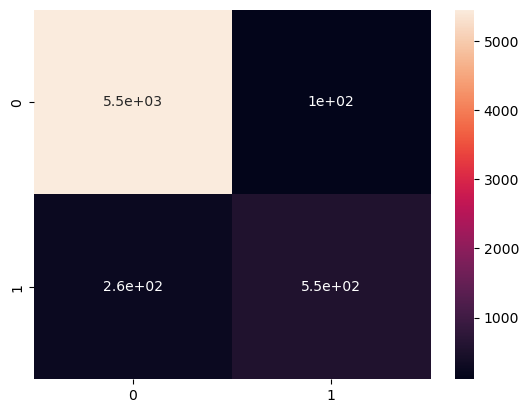

In [307]:
performance(y_test,X_test,gnb2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12921
           1       1.00      1.00      1.00      1960

    accuracy                           1.00     14881
   macro avg       1.00      1.00      1.00     14881
weighted avg       1.00      1.00      1.00     14881

AUC score: 0.9999996841086098
f1_score: 0.999744832865527


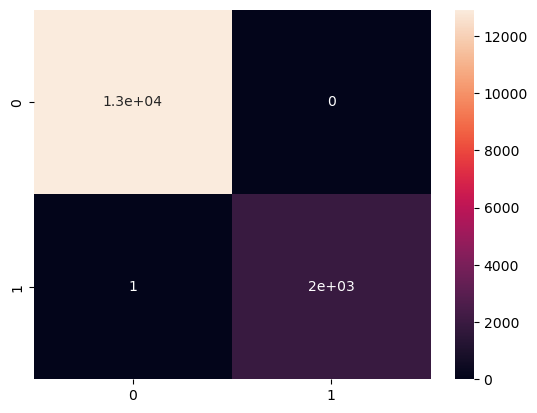

In [308]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_train, X_train, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5565
           1       0.99      0.98      0.99       813

    accuracy                           1.00      6378
   macro avg       0.99      0.99      0.99      6378
weighted avg       1.00      1.00      1.00      6378

AUC score: 0.9993571445148414
f1_score: 0.9851851851851852


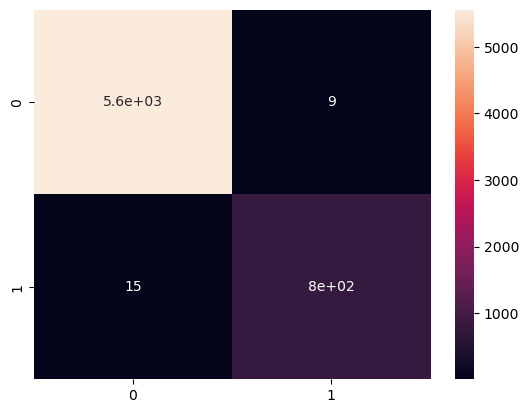

In [309]:
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12921
           1       1.00      1.00      1.00      1960

    accuracy                           1.00     14881
   macro avg       1.00      1.00      1.00     14881
weighted avg       1.00      1.00      1.00     14881

AUC score: 0.9999999210271524
f1_score: 0.999744832865527


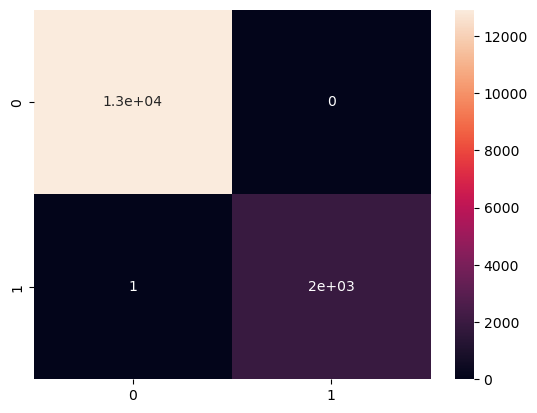

In [310]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12921
           1       1.00      1.00      1.00      1960

    accuracy                           1.00     14881
   macro avg       1.00      1.00      1.00     14881
weighted avg       1.00      1.00      1.00     14881

AUC score: 0.9999999210271524
f1_score: 0.999744832865527


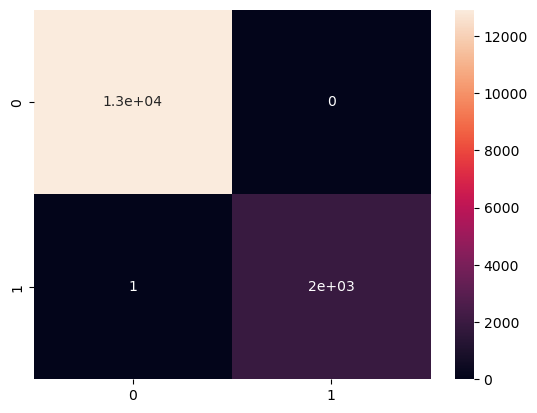

In [311]:
performance(y_train, X_train, xgb_model)

In [312]:
df_oversampling = pd.read_excel('oversampling models.xlsx')

In [313]:
df_oversampling

,Split,Model Name,Training F1score,Testing F1score,Training Recall,Testing Recall,Training AUC Score,Testing AUC Score
0,50-50,Decision Tree,0.9719,0.9720,0.9600,0.9500,0.9774,0.9771
1,50-50,Random Forest,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999
2,50-50,Xgboost,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999
3,50-50,GaussianNB,0.8897,0.8880,0.8500,0.8500,0.9721,0.9714
4,70-30,Decision Tree,0.9505,0.9512,0.9900,0.9800,0.9689,0.9694
5,70-30,Random Forest,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999
6,70-30,Xgboost,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999
7,70-30,GaussianNB,0.9109,0.9130,0.8800,0.8900,0.9721,0.9726
8,60-40,Decision Tree,0.9728,0.9733,0.9600,0.9600,0.9775,0.9776
9,60-40,Random Forest,0.9993,0.9999,1.0000,1.0000,0.9999,0.9993


In [327]:
df_undersampling = pd.read_excel('undersampling.xlsx')

In [328]:
df_undersampling

,Split,Model Name,Training F1score,Testing F1score,Training Recall,Testing Recall,Training AUC Score,Testing AUC Score
0,50-50,Decision Tree,0.9767,0.9695,0.97,0.95,0.9832,0.9742
1,50-50,Random Forest,1.0000,0.9812,1.00,0.97,0.9999,0.9992
2,50-50,Xgboost,0.9997,0.9958,1.00,0.99,0.9999,0.9996
3,50-50,GaussianNB,0.8791,0.8701,0.84,0.82,0.9698,0.9627
4,70-30,Decision Tree,0.9744,0.9675,0.95,0.94,0.9750,0.9685
5,70-30,Random Forest,0.9999,0.9761,1.00,0.97,0.9999,0.9999
6,70-30,Xgboost,0.9999,0.9981,1.00,1.00,1.0000,0.9999
7,70-30,GaussianNB,0.8059,0.8072,0.72,0.73,0.9708,0.9733
8,60-40,Decision Tree,0.9709,0.9818,0.96,0.97,0.9778,0.9867
9,60-40,Random Forest,0.9992,0.9898,1.00,0.99,0.9999,0.9985
